# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [4]:
from google.colab import auth
auth.authenticate_user()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/My Drive/contents/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

print("file_list",file_list)


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_df = pd.read_parquet(file_path)

        # Convert the 'tpep_pickup_datetime' column to datetime
        current_df['tpep_pickup_datetime'] = pd.to_datetime(current_df['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        dateList = current_df['tpep_pickup_datetime'].dt.date.unique()
        print("date list == ", dateList)

        # Loop through dates and then loop through every hour of each date
        for date in current_df['tpep_pickup_datetime'].dt.date.unique():
            print("date",date)

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter the data for the current date and hour
                print("hour",hour)
                hour_data = current_df[(current_df['tpep_pickup_datetime'].dt.date == date) & (current_df['tpep_pickup_datetime'].dt.hour == hour)]

                # Sample 5% of the hourly data randomly
                hourly_sample = hour_data.sample(frac = 0.05,random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, hourly_sample])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        df.info()
        df.head()

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Streaming output truncated to the last 5000 lines.
hour 2
hour 3
hour 4
hour 5
hour 6
hour 7
hour 8
hour 9
hour 10
hour 11
hour 12
hour 13
hour 14
hour 15
hour 16
hour 17
hour 18
hour 19
hour 20
hour 21
hour 22
hour 23
date 2023-05-25
hour 0
hour 1
hour 2
hour 3
hour 4
hour 5
hour 6
hour 7
hour 8
hour 9
hour 10
hour 11
hour 12
hour 13
hour 14
hour 15
hour 16
hour 17
hour 18
hour 19
hour 20
hour 21
hour 22
hour 23
date 2023-05-26
hour 0
hour 1
hour 2
hour 3
hour 4
hour 5
hour 6
hour 7
hour 8
hour 9
hour 10
hour 11
hour 12
hour 13
hour 14
hour 15
hour 16
hour 17
hour 18
hour 19
hour 20
hour 21
hour 22
hour 23
date 2023-05-27
hour 0
hour 1
hour 2
hour 3
hour 4
hour 5
hour 6
hour 7
hour 8
hour 9
hour 10
hour 11
hour 12
hour 13
hour 14
hour 15
hour 16
hour 17
hour 18
hour 19
hour 20
hour 21
hour 22
hour 23
date 2023-05-28
hour 0
hour 1
hour 2
hour 3
hour 4
hour 5
hour 6
hour 7
hour 8
hour 9
hour 10
hour 11
hour 12
hour 13
hour 14
hour 15
hour 16
hour 17
hour 18
hour 19
hour 20
hour 21
hour 

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('sampledData.parquet')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file
# Select the folder having data files
import os
os.chdir('/content/drive/My Drive/contents/Assignments/EDA/data_NYC_Taxi/trip_records/')
df_sampled = pd.read_parquet('sampledData.parquet')

In [44]:
# df.head()
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
428               256             2        32.40    6.0      0.5        0.00   
1113              237             1         7.90    1.0      0.5        2.58   
819               141             2        11.40    1.0      0.5        0.00   
3192              142             2         6.50    1.0      0.5        0.00   
2995263           107             0        25.64    0.0      0.5        5.93   

         tolls_amount  improvement_surcharge  total_amount  \
428               0.0                    1.0         41.15   
1113              0.0                    1.0         15.48   
819               0.0                    1.0         16.40   
3192              0.0                    1.0         11.50   
2995263           0.0                    1.0         35.57   

         congestion_surcharge  airport_fee  Airport_fee  
428                       0.0         1.25          NaN  
1113                      2.5         0.00          NaN  
819                       2.5         0.00          NaN  
3192                      2.5         0.00          NaN  
2995263                   NaN          NaN          NaN

In [19]:
# df.info()
df_sampled.isna().sum()*100/df_sampled.shape[0]

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
airport_fee              92.170270
Airport_fee              11.250633
dtype: float64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed


# remove store_and_fwd_flag column
df_sampled.drop('store_and_fwd_flag', axis=1, inplace=True)

# check if store_and_fwd_flag is removed or not
df_sampled.isnull().sum()*100/df_sampled.shape[0]

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
airport_fee              92.170270
Airport_fee              11.250633
dtype: float64

In [9]:
# fix the index
df_sampled.reset_index(drop=True, inplace=True)

df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns
# if Airport_fee column is blank then fill that value with airport_fee colukn value if it's non null otherwise fill it with 0
df_sampled['Airport_fee'].fillna(df_sampled['airport_fee'], inplace=True)

<ipython-input-10-a6efc75119ea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sampled['Airport_fee'].fillna(df_sampled['airport_fee'], inplace=True)


In [11]:
# check if Airport_fee null values has decreased or not
df_sampled.isna().sum()*100/df_sampled.shape[0]

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
airport_fee              92.170270
Airport_fee               3.420903
dtype: float64

In [12]:
# drop rows where Airport_fee is NaN and passenger count is NaN
df_filter = df_sampled[(df_sampled['Airport_fee'].isna()) & (df_sampled['passenger_count'].isna())]
df_sampled.drop(df_filter.index, inplace=True)

In [13]:
# check if Airport_fee null values has decreased or not
df_sampled.isnull().sum()*100/df_sampled.shape[0]

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      0.000000
airport_fee              91.892935
Airport_fee               0.000000
dtype: float64

In [14]:
# drop airport_fee column
df_sampled.drop('airport_fee', axis=1, inplace=True)

In [15]:
# rename Airport_fee to airport_fee
df_sampled.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831526 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), float

In [16]:
#  there should be no NaN
df_sampled.isnull().sum()*100/df_sampled.shape[0]

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [17]:
# check where values of fare amount are negative
df_sampled[df_sampled['fare_amount'] < 0].shape[0]

0

In [18]:
df_sampled['VendorID'].value_counts()

VendorID
2    1348571
1     482955
Name: count, dtype: int64

In [19]:
df_sampled.groupby(['VendorID'])['tpep_pickup_datetime'].count()

VendorID
1     482955
2    1348571
Name: tpep_pickup_datetime, dtype: int64

In [ ]:
# check the negative monetary values
df_sampled[(df_sampled['fare_amount'] < 0) | (df_sampled['total_amount'] < 0) | (df_sampled['tolls_amount'] < 0) | (df_sampled['tip_amount'] < 0) | (df_sampled['extra'] < 0) | (df_sampled['mta_tax'] < 0) | (df_sampled['improvement_surcharge'] < 0) | (df_sampled['congestion_surcharge'] < 0) | (df_sampled['airport_fee'] < 0)]


RatecodeID
1.0    50
2.0    24
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64

In [20]:
# Fix columns with negative (monetary) values

df_negative_monetry_values = df_sampled[(df_sampled['fare_amount'] < 0) | (df_sampled['total_amount'] < 0) | (df_sampled['tolls_amount'] < 0) | (df_sampled['tip_amount'] < 0) | (df_sampled['extra'] < 0) | (df_sampled['mta_tax'] < 0) | (df_sampled['improvement_surcharge'] < 0) | (df_sampled['congestion_surcharge'] < 0) | (df_sampled['airport_fee'] < 0)]

# Drop the rows where
df_sampled.drop(df_negative_monetry_values.index, inplace=True)

In [21]:
# check there should not be any negative monetary value
df_sampled[(df_sampled['fare_amount'] < 0) | (df_sampled['total_amount'] < 0) | (df_sampled['tolls_amount'] < 0) | (df_sampled['tip_amount'] < 0) | (df_sampled['extra'] < 0) | (df_sampled['mta_tax'] < 0) | (df_sampled['improvement_surcharge'] < 0) | (df_sampled['congestion_surcharge'] < 0) | (df_sampled['airport_fee'] < 0)].shape[0]


0

Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts
df_sampled['RatecodeID'].value_counts()

RatecodeID
1.0     1729209
2.0       71646
99.0      10472
5.0       10272
3.0        6123
4.0        3722
6.0           3
Name: count, dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
df_sampled.isna().sum()*100/df_sampled.shape[0]


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df_sampled[df_sampled['passenger_count'].isna()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [24]:
# check if passenger_count is 0
df_sampled[df_sampled['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
118             2  2023-01-01 00:47:28   2023-01-01 00:47:32              0.0   
192             1  2023-01-01 00:50:09   2023-01-01 01:14:29              0.0   
197             1  2023-01-01 00:23:01   2023-01-01 00:32:42              0.0   
234             1  2023-01-01 00:42:48   2023-01-01 00:52:02              0.0   
235             1  2023-01-01 00:58:49   2023-01-01 01:04:32              0.0   
...           ...                  ...                   ...              ...   
1896099         1  2023-12-31 22:45:00   2023-12-31 23:07:43              0.0   
1896132         1  2023-12-31 22:38:04   2023-12-31 22:40:34              0.0   
1896268         1  2023-12-31 23:13:06   2023-12-31 23:17:16              0.0   
1896304         1  2023-12-31 23:44:04   2023-12-31 23:53:59              0.0   
1896366         1  2023-12-31 23:06:18   2023-12-31 23:25:09              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
118                0.0         5.0           232           232             1   
192                3.0         1.0           237            90             1   
197                2.4         1.0            43           166             1   
234                1.0         1.0           162           161             1   
235                0.7         1.0           186           234             1   
...                ...         ...           ...           ...           ...   
1896099            1.4         1.0           186           186             2   
1896132            0.8         1.0           107           137             1   
1896268            0.7         1.0            24           151             1   
1896304            1.5         1.0           229           164             4   
1896366            2.0         1.0           246           143             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
118             14.0    0.0      0.0         0.0           0.0   
192             22.6    3.5      0.5         6.9           0.0   
197             12.8    3.5      0.5         2.2           0.0   
234             10.0    3.5      0.5         1.5           0.0   
235              6.5    3.5      0.5         2.3           0.0   
...              ...    ...      ...         ...           ...   
1896099         19.1    3.5      0.5         0.0           0.0   
1896132          5.8    3.5      0.5         0.0           0.0   
1896268          8.6    1.0      0.5         2.2           0.0   
1896304         11.4    3.5      0.5         0.0           0.0   
1896366         18.4    3.5      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
118                        1.0          15.0                   0.0   
192                        1.0          34.5                   2.5   
197                        1.0          20.0                   2.5   
234                        1.0          16.5                   2.5   
235                        1.0          13.8                   2.5   
...                        ...           ...                   ...   
1896099                    1.0          24.1                   2.5   
1896132                    1.0          10.8                   2.5   
1896268                    1.0          13.3                   0.0   
1896304                    1.0          16.4                   2.5   
1896366                    1.0          23.4                   2.5   

         airport_fee  
118              0.0  
192              0.0  
197              0.0  
234              0.0  
235              0.0  
...              ...  
1896099          0.0  
1896132          0.0  
1896268          0.0  
1896304          0.0  
1896366          0.0  

[29681 rows x 18 columns]

In [25]:
# drop the rows where passenger_count is 0
df_sampled = df_sampled[df_sampled['passenger_count'] != 0]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [26]:
# Fix missing values in 'RatecodeID'
df_sampled['RatecodeID'].value_counts()

RatecodeID
1.0     1700678
2.0       70865
99.0      10437
5.0       10051
3.0        6043
4.0        3689
6.0           3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [27]:
# handle null values in congestion_surcharge

df_sampled['congestion_surcharge'].isna().sum()

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df_sampled.isna().sum()*100/df_sampled.shape[0]


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_sampled.describe()

# trip_distance = 0
# rateCodeID = 99




VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.801766e+06                     1801766                     1801766   
mean   1.748375e+00  2023-07-02 00:56:43.446413  2023-07-02 01:14:08.085088   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 21:54:58  2023-04-01 22:14:16.750000   
50%    2.000000e+00         2023-06-26 13:15:25         2023-06-26 13:35:02   
75%    2.000000e+00  2023-10-05 22:28:29.500000  2023-10-05 22:44:12.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.339468e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.801766e+06   1.801766e+06  1.801766e+06  1.801766e+06   
mean      1.391765e+00   3.563801e+00  1.642183e+00  1.654276e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.060000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.390000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   5.682380e+04  9.900000e+01  2.650000e+02   
std       8.824649e-01   5.033380e+01  7.441822e+00  6.366898e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.801766e+06  1.801766e+06  1.801766e+06  1.801766e+06  1.801766e+06   
mean   1.643109e+02  1.204096e+00  1.986844e+01  1.611242e+00  4.953410e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01  4.000000e+00   
std    6.975815e+01  4.653521e-01  1.082180e+02  1.828076e+00  4.831134e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.801766e+06  1.801766e+06           1.801766e+06  1.801766e+06   
mean   3.582726e+00  5.992154e-01           9.993202e-01  2.900748e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.072000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.074016e+00  2.189311e+00           2.419933e-02  1.090924e+02   

       congestion_surcharge   airport_fee  
count          1.801766e+06  1.801766e+06  
mean           2.307535e+00  1.437535e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.664229e-01  4.660983e-01

In [28]:
df_sampled = df_sampled[df_sampled['payment_type'] > 0]

In [29]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1801766 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), float

In [30]:
# Trip distance can not be zero where PULocationID and DOLocationID are different
#Trip Distances which are above 99.99 percentile can be considered as outliers and can be removed
df_sampled = df_sampled[~((df_sampled['trip_distance'] == 0) & (df_sampled['PULocationID'] == df_sampled['DOLocationID']))]


In [31]:
distance_threshold = np.percentile(df_sampled['trip_distance'], 99.99)
df_sampled = df_sampled[df_sampled['trip_distance'] < distance_threshold]

In [32]:
# tip amount can be fraction of fare amount
tip_per_fare_threshold = np.percentile(df_sampled['tip_amount']/df_sampled['fare_amount'], 99.99)
df_sampled[df_sampled['tip_amount'] > tip_per_fare_threshold]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [33]:
# remove passenger_count > 6

df_sampled = df_sampled[df_sampled['passenger_count'] <= 6]
df_sampled['passenger_count'].value_counts()

passenger_count
1.0    1365903
2.0     275248
3.0      68466
4.0      37794
5.0      23816
6.0      15803
Name: count, dtype: int64

In [34]:
# Continue with outlier handling

# remove where trip_distance is more than 250 mile
df_sampled = df_sampled[df_sampled['trip_distance'] <= 250]

In [35]:
# if tripDistance=0 and fareAmount=0 but the pickup and dropoff zones are different. Then there is some mismatch. Drop those records.
df_filtered = df_sampled[(df_sampled['trip_distance'] == 0) & (df_sampled['fare_amount'] == 0) & (df_sampled['PULocationID'] != df_sampled['DOLocationID'])]

# drop these rows
df_sampled.drop(df_filtered.index, inplace=True)

In [36]:
# reset index
df_sampled.reset_index(drop=True, inplace=True)

In [37]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786976 entries, 0 to 1786975
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

In [38]:
# entries where trip_distance is 0 and fare_amount > 300 and pickup drop zones are same
df_filtered_distance = df_sampled[(df_sampled['trip_distance'] == 0) & (df_sampled['fare_amount'] > 300) & (df_sampled['PULocationID'] == df_sampled['DOLocationID'])]

df_sampled.drop(df_filtered_distance.index, inplace=True)

In [39]:
# check if there is any row which has trip_distance is 0 and fare_amount > 300 and pickup drop zones are same
df_sampled[(df_sampled['trip_distance'] == 0) & (df_sampled['fare_amount'] > 300) & (df_sampled['PULocationID'] == df_sampled['DOLocationID'])]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [40]:
# remove outliners for trip distance
df_sampled = df_sampled[df_sampled['trip_distance'] > 0]


In [41]:
# Do any columns need standardising?

# replace RatecodeID to 1 if RatecodeID is 99

# df_sampled['RatecodeID'].value_counts()

df_sampled['RatecodeID'] = df_sampled['RatecodeID'].apply(lambda x: 1.0 if x == 99.0 else x)

In [42]:
# check if any rateCodeID is 99.0
df_sampled['RatecodeID'].value_counts()

RatecodeID
1.0    1696225
2.0      69127
3.0       5729
5.0       4766
4.0       3610
6.0          1
Name: count, dtype: int64

<Axes: >

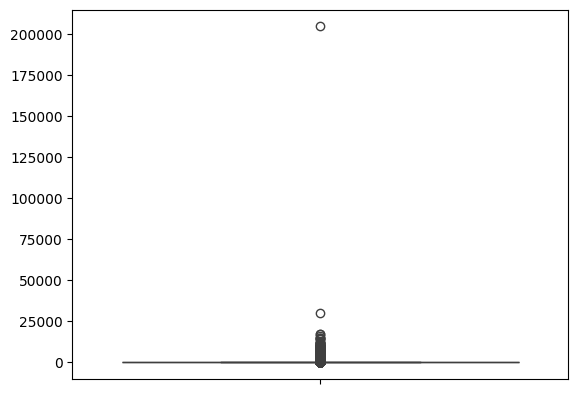

In [ ]:
# remove outliners from fare_amount/tripdistance
sns.boxplot(df_sampled['fare_amount']/df_sampled['trip_distance'])

In [43]:
# remove outliners where amount per mile is more than 25000
df_sampled = df_sampled[df_sampled['fare_amount']/df_sampled['trip_distance'] < 25000]

In [44]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779456 entries, 0 to 1786975
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), float

In [45]:
# assign df as df_sampled
df = df_sampled

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [46]:
# Find and show the hourly trends in taxi pickups
# create a new column pickup_hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [47]:
# find the hourly trip
hourly_trips = df.groupby(['pickup_hour']).size()

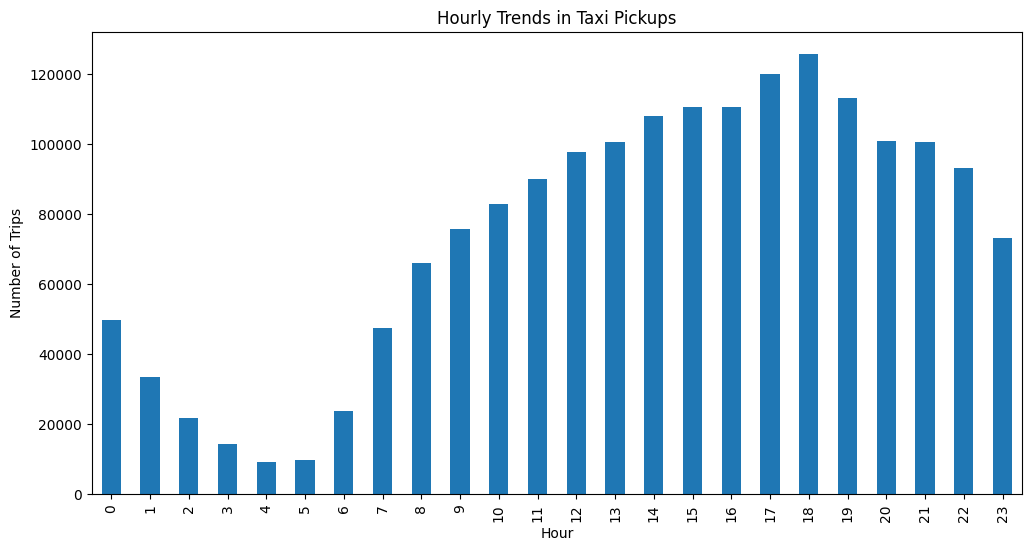

In [48]:
# plot the trend for hourly trip

plt.figure(figsize=(12, 6))
hourly_trips.plot(kind="bar")
plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.show()

In [49]:
# Find days of the week for the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
pickup_day_trends = df.groupby(['pickup_day']).size()

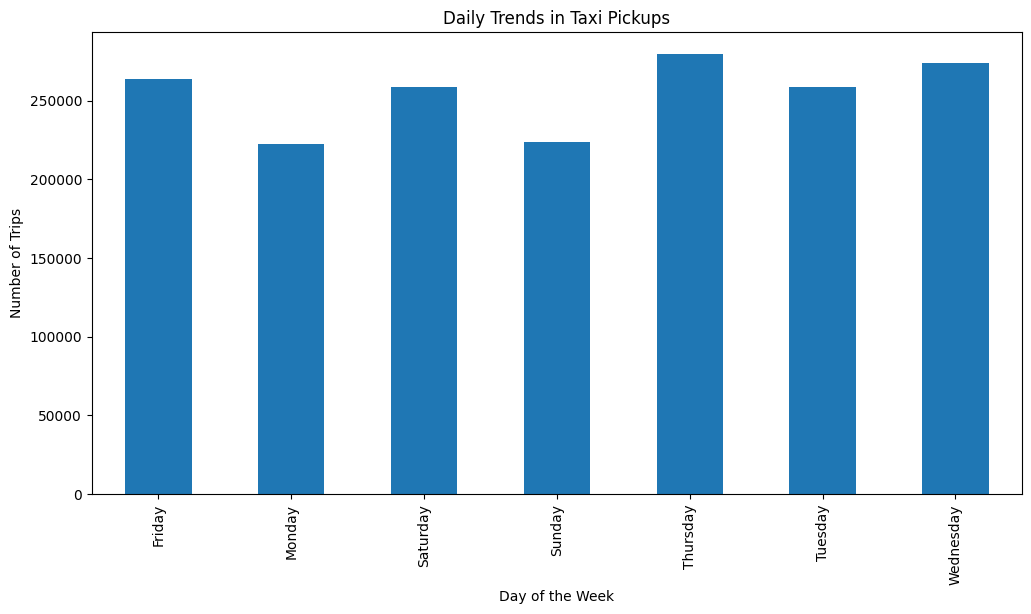

In [50]:
# show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(12,6))
pickup_day_trends.plot(kind="bar")
plt.title("Daily Trends in Taxi Pickups")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.show()

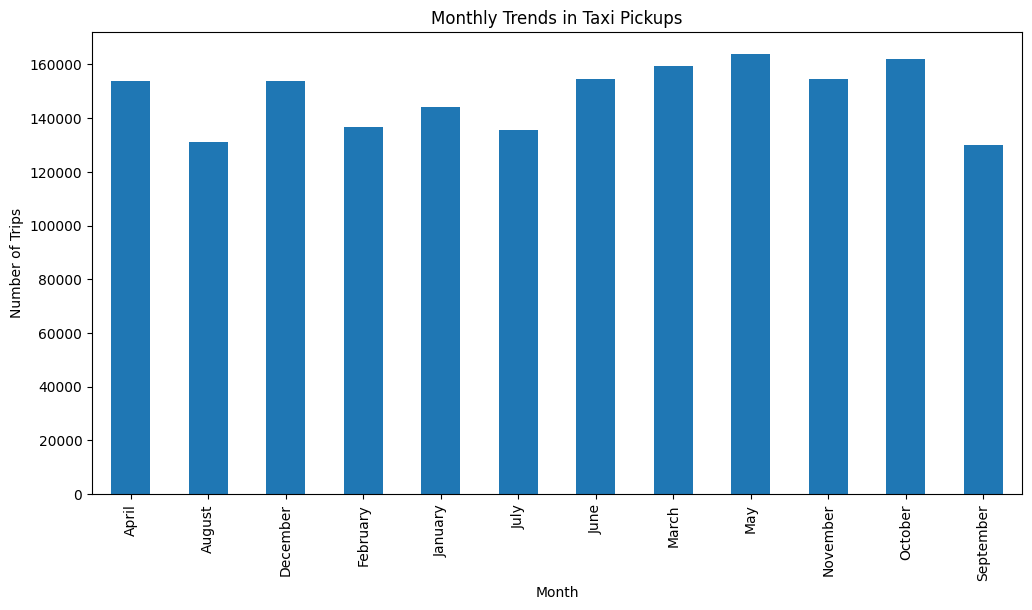

In [51]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
pickup_month_trend = df.groupby(['pickup_month']).size()

plt.figure(figsize=(12,6))
pickup_month_trend.plot(kind="bar")
plt.title("Monthly Trends in Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [52]:
# Analyse the above parameters
df[(df['fare_amount']<=0) | (df['tip_amount']<=0) | (df['total_amount']<=0) | (df['trip_distance']<=0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
9               2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
14              2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
...           ...                  ...                   ...              ...   
1786964         2  2023-12-31 23:43:05   2023-12-31 23:48:31              1.0   
1786965         2  2023-12-31 23:23:43   2023-12-31 23:35:31              1.0   
1786967         2  2023-12-31 23:15:53   2023-12-31 23:21:02              1.0   
1786968         1  2023-12-31 23:06:37   2023-12-31 23:20:15              1.0   
1786975         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 7.74         1.0           138           256             2   
2                 1.44         1.0           237           141             2   
3                 0.54         1.0           143           142             2   
9                 0.78         1.0           237           229             2   
14                0.74         1.0           229           141             1   
...                ...         ...           ...           ...           ...   
1786964           1.16         1.0            43           237             1   
1786965           1.74         1.0           261           148             1   
1786967           0.61         1.0           170           164             1   
1786968           4.50         1.0           170           209             2   
1786975           8.45         1.0           142           261             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0               32.4  ...      0.5         0.0           0.0   
2               11.4  ...      0.5         0.0           0.0   
3                6.5  ...      0.5         0.0           0.0   
9                7.2  ...      0.5         0.0           0.0   
14               5.8  ...      0.5         0.0           0.0   
...              ...  ...      ...         ...           ...   
1786964          7.9  ...      0.5         0.0           0.0   
1786965         12.8  ...      0.5         0.0           0.0   
1786967          6.5  ...      0.5         0.0           0.0   
1786968         21.2  ...      0.5         0.0           0.0   
1786975         40.8  ...      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         41.15                   0.0   
2                          1.0         16.40                   2.5   
3                          1.0         11.50                   2.5   
9                          1.0         12.20                   2.5   
14                         1.0         10.80                   2.5   
...                        ...           ...                   ...   
1786964                    1.0         12.90                   2.5   
1786965                    1.0         17.80                   2.5   
1786967                    1.0         11.50                   2.5   
1786968                    1.0         26.20                   2.5   
1786975                    1.0         45.80                   2.5   

         airport_fee  pickup_hour  pickup_day pickup_month  
0               1.25            0      Sunday      January  
2               0.00            0      Sunday      January  
3               0.00            0      Sunday      January  
9               0.00            0      Sunday      January  
14              0.00            0      Sunday      January  
...              ...          ...         ...          ...  
1786964         0.00           23     

In [ ]:
# leave out row with zero fare_amount, tip_amount, total_amount, and also trip_distance.

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [53]:
# Create a df with non zero entries for the selected parameters.
df_zeros = df[(df['fare_amount']<=0) | (df['total_amount']<=0)]
df.drop(df_zeros.index, inplace=True)

In [54]:
# check if any zero fare_amount, total _amount and tip_amount is zero but trip_distance is not zero
df[(df['fare_amount']<=0) & (df['tip_amount']<=0) & (df['total_amount']<=0) & (df['trip_distance'] > 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_hour, pickup_day, pickup_month]
Index: []

[0 rows x 21 columns]

In [55]:
# remove all the rows where fare_amount, total _amount and tip_amount is zero but trip_distance is not zero
df_zero_amount = df[(df['fare_amount']<=0) & (df['tip_amount']<=0) & (df['total_amount']<=0) & (df['trip_distance'] > 0)]
df.drop(df_zero_amount.index, inplace=True)

In [56]:
#check if any rows where fare_amount, total _amount and tip_amount is zero but trip_distance is not zero present
df[(df['fare_amount']<=0) & (df['tip_amount']<=0) & (df['total_amount']<=0) & (df['trip_distance'] > 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_hour, pickup_day, pickup_month]
Index: []

[0 rows x 21 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779217 entries, 0 to 1786975
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  pickup_hour            int3

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

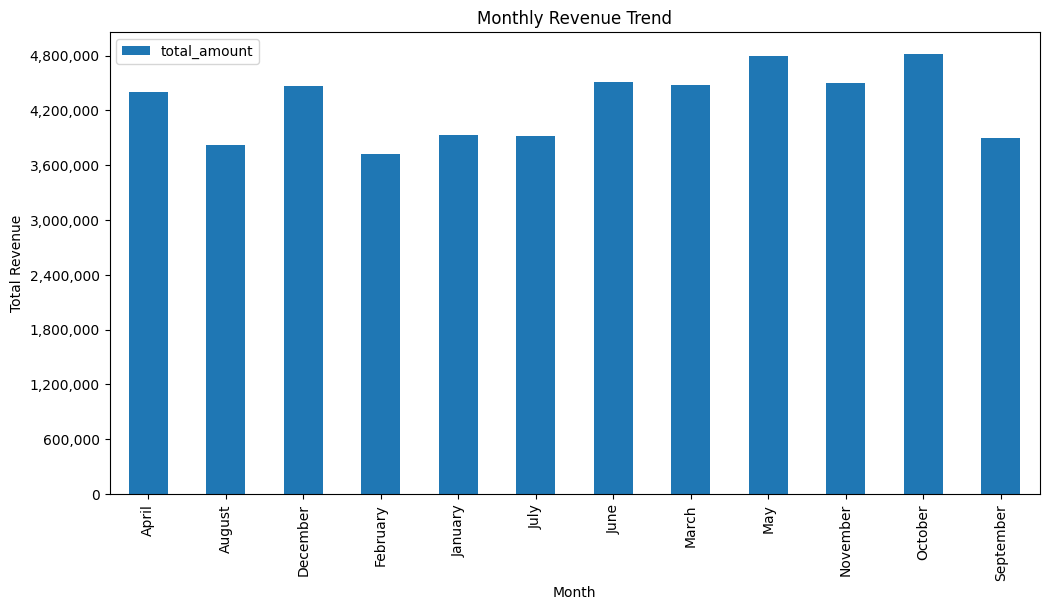

In [58]:
# Group data by month and analyse monthly revenue
import matplotlib.ticker as ticker

monthly_revenue = df.groupby(['pickup_month'])['total_amount'].sum().reset_index()
ax = monthly_revenue.plot(kind="bar", x="pickup_month", y="total_amount", figsize=(12, 6))
# round off y ticks otherwise if will appear as only 1.0, 2.0
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
#increase ticks to be more clear on y axis
ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
df.groupby(['pickup_month'])['total_amount'].sum()

pickup_month
April        4470512.49
August       3890585.34
December     4546025.10
February     3778936.25
January      3993323.04
July         3994644.70
June         4583904.21
March        4551069.64
May          4866010.45
November     4560585.06
October      4894621.22
September    4116292.56
Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

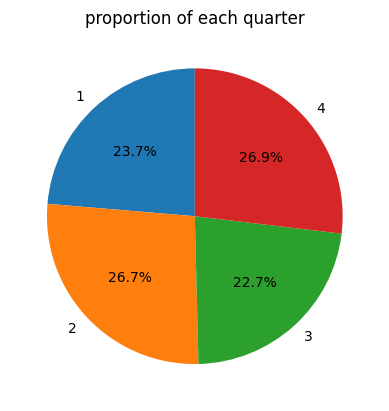

In [59]:
# Calculate proportion of each quarter

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

df_quarter_proportion = df.groupby(['quarter'])['total_amount'].sum()*100/df['total_amount'].sum()
# df_quarter_proportion.head()

plt.pie(df_quarter_proportion, labels=df_quarter_proportion.index, autopct='%1.1f%%', startangle=90)
plt.title("proportion of each quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

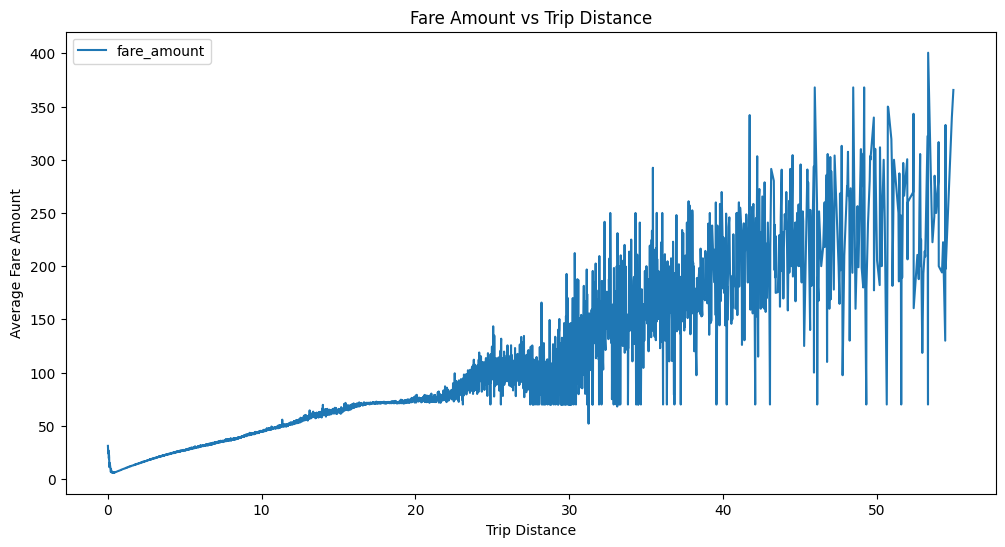

In [62]:
# Show how trip fare is affected by distance
df_filter_trip_non_zero = df[df['trip_distance'] > 0]
fare_by_trip_distance = pd.pivot_table(df_filter_trip_non_zero, index='trip_distance', values='fare_amount', aggfunc='mean')

fare_by_trip_distance.plot(kind="line", figsize=(12,6))
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Fare Amount')
plt.show()


In [ ]:
# correlation value between trip_distance and fare_amount
df_filter_trip_non_zero["trip_distance"].corr(df_filter_trip_non_zero["fare_amount"])

np.float64(0.9496716627835351)

In [ ]:
df.shape

(1391268, 22)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

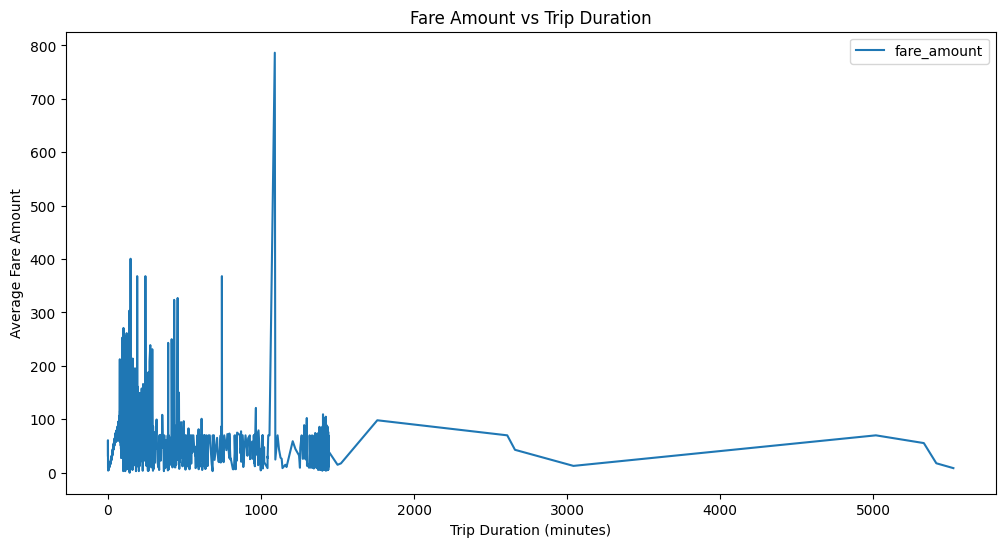

In [63]:
# Show relationship between fare and trip duration

df['trip duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60

# take abs value for trip duration
df['trip duration'] = df['trip duration'].abs()


fare_by_trip_duration = pd.pivot_table(df, index='trip duration', values='fare_amount', aggfunc='mean')
fare_by_trip_duration.plot(kind="line", figsize=(12,6))
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Average Fare Amount')
plt.show()

In [ ]:
df['trip duration'].corr(df['fare_amount'])

np.float64(0.32656713993116215)

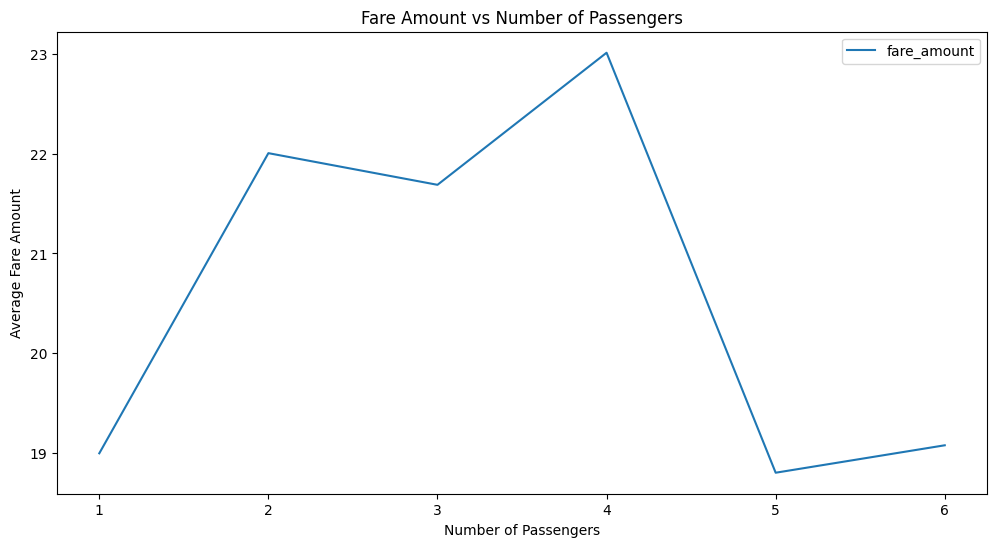

In [64]:
# Show relationship between fare and number of passengers

df_fare_by_passenger = pd.pivot_table(df, index='passenger_count', values='fare_amount', aggfunc='mean')
df_fare_by_passenger.plot(kind="line", figsize=(12,6))
plt.title('Fare Amount vs Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Amount')
plt.show()


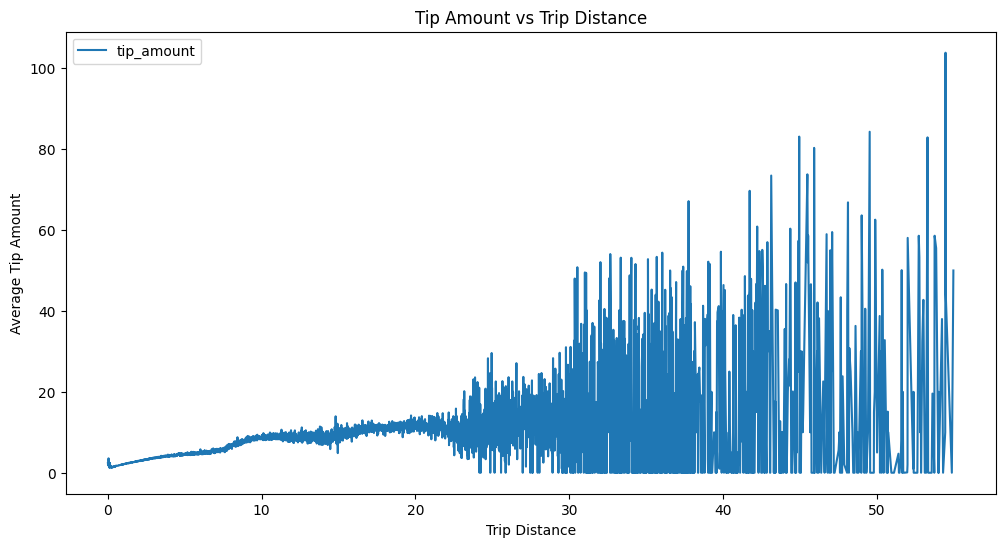

In [65]:
# Show relationship between tip and trip distance

tip_by_trip_distance = pd.pivot_table(df,index='trip_distance', values='tip_amount', aggfunc='mean')
tip_by_trip_distance.plot(kind="line", figsize=(12,6))
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Amount')
plt.show()


# sns.scatterplot(data=df[df['tip_amount']/df['fare_amount'] < 0.3], x='trip_distance', y='tip_amount')
# plt.title('Tip Amount vs Trip Distance')
# plt.xlabel('Trip Distance')
# plt.ylabel('Tip Amount')
# plt.show()

In [ ]:
df['tip_amount'].corr(df['fare_amount'])

np.float64(0.8296502614934208)

In [ ]:
df['payment_type'].value_counts()

payment_type
1    1391224
2         21
4         16
3          7
Name: count, dtype: int64

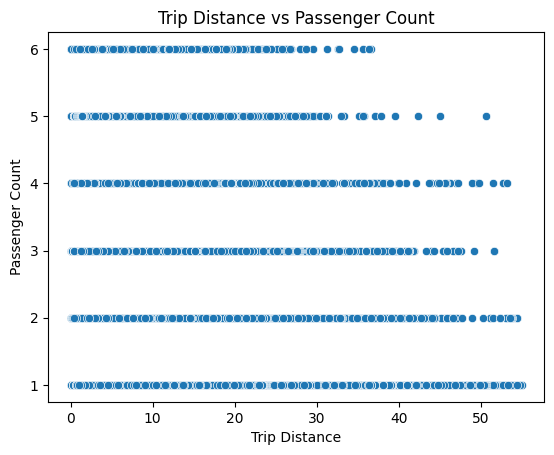

In [87]:
# show the relation between trip distance and passenger count
sns.scatterplot(data=df_sampled, x='trip_distance', y='passenger_count')
plt.title('Trip Distance vs Passenger Count')
plt.xlabel('Trip Distance')
plt.ylabel('Passenger Count')
plt.show()

In [88]:
df_sampled['trip_distance'].corr(df_sampled['passenger_count'])

np.float64(0.03816104561144689)

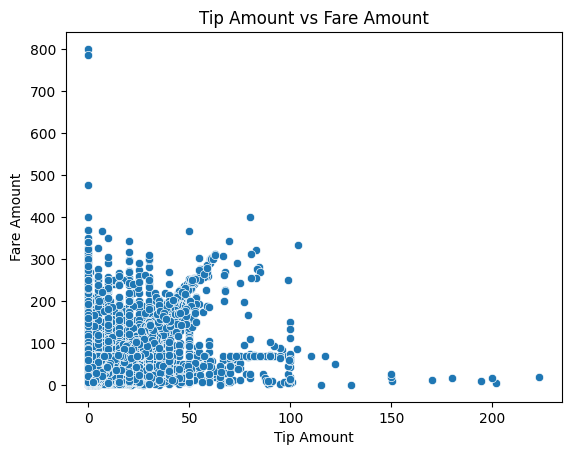

In [92]:
# analyse the relationship between fare/tips
sns.scatterplot(data=df_sampled, x='tip_amount', y='fare_amount')
plt.title('Tip Amount vs Fare Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Fare Amount')
plt.show()

In [93]:
df_sampled['tip_amount'].corr(df_sampled['fare_amount'])

np.float64(0.6097554737165118)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

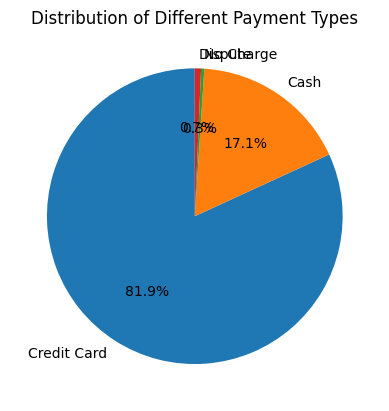

In [68]:
# Analyse the distribution of different payment types (payment_type).
payment_type_count = df['payment_type'].value_counts()
payment_types = payment_type_count.loc[[1,2,3,4]]


labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute']

# Create a pie chart
# plt.figure(figsize=(8, 6))
# plt.barh(labels, payment_types)
# plt.title('Distribution of Different Payment Types')
# plt.xlabel('Count')
# plt.ylabel('Payment Type')
# plt.show()


plt.pie(payment_types, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Different Payment Types")
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [67]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [69]:
import geopandas as gpd
import os

# Read the shapefile using geopandas
os.chdir('/content/drive/My Drive/contents/Assignments/EDA/data_NYC_Taxi/taxi_zones/')
zones = gpd.read_file('taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

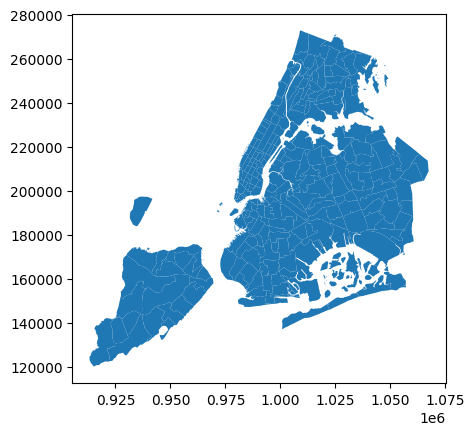

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [72]:
# Merge zones and trip records using locationID and PULocationID


df_merged = df.merge(zones, left_on='PULocationID', right_on='LocationID')

df_merged.shape


(1763296, 30)

In [73]:
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4           7.10         1.0           246            37             1   

   fare_amount  ...  pickup_month  quarter  trip duration  OBJECTID  \
0         32.4  ...       January        1      15.950000       138   
1          7.9  ...       January        1       5.083333       161   
2         11.4  ...       January        1      10.550000       237   
3          6.5  ...       January        1       5.416667       143   
4         34.5  ...       January        1      33.616667       246   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.107467    0.000537          LaGuardia Airport         138     Queens   
1    0.035804    0.000072             Midtown Center         161  Manhattan   
2    0.042213    0.000096      Upper East Side South         237  Manhattan   
3    0.054180    0.000151        Lincoln Square West         143  Manhattan   
4    0.069467    0.000281  West Chelsea/Hudson Yards         246  Manhattan   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((983031.177 217138.506, 983640.32 216...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [74]:
# Group data by location and calculate the number of trips

df_trips_per_location = df_merged.groupby(['LocationID']).size().reset_index(name='trip_count')
df_trips_per_location.head()



LocationID  trip_count
0           1          47
1           2           2
2           3          31
3           4        1776
4           5           9

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [75]:
# Merge trip counts back to the zones GeoDataFrame

df_merged_zones_with_tripCount = zones.merge(df_trips_per_location, left_on='LocationID', right_on='LocationID')
df_merged_zones_with_tripCount.head()
zones = df_merged_zones_with_tripCount


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

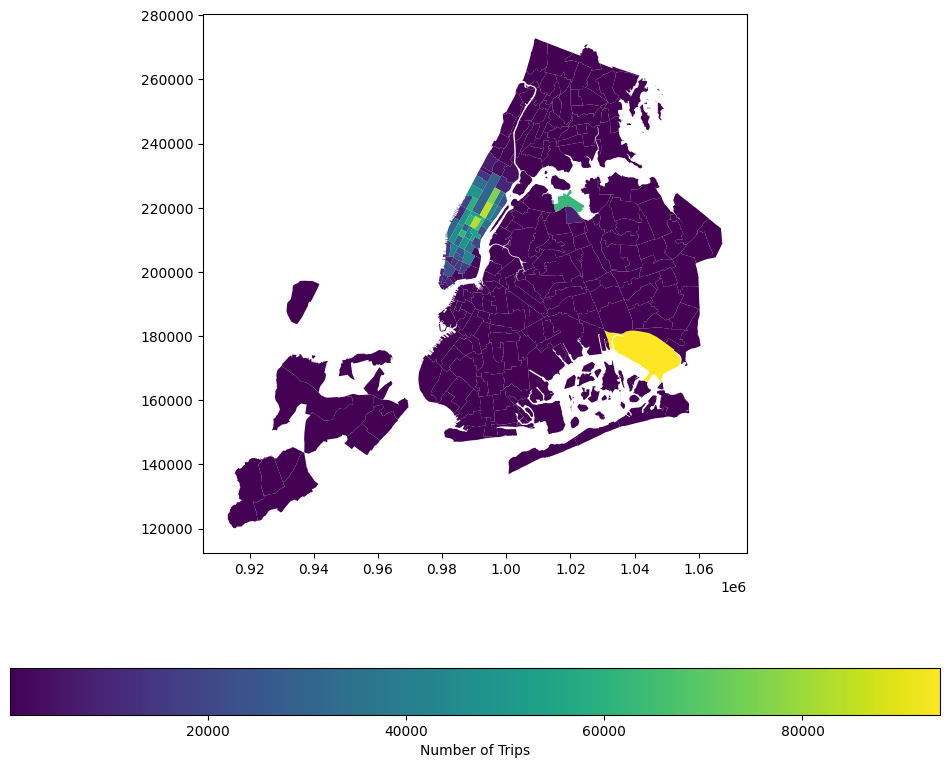

In [76]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot('trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()



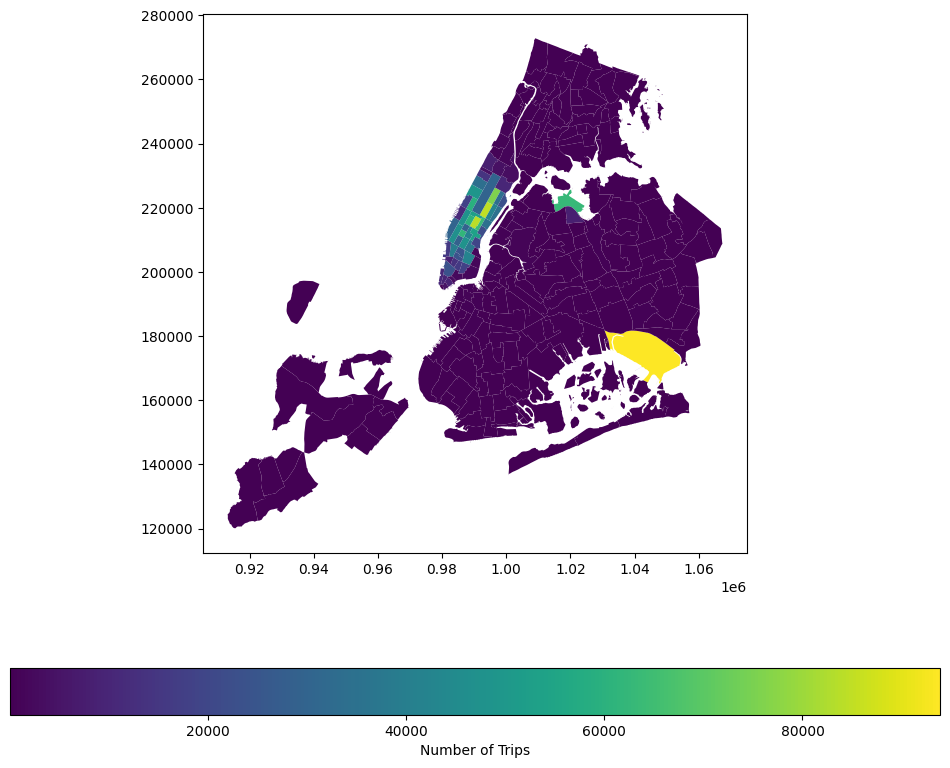

In [77]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_trip_zones = zones.sort_values(by='trip_count', ascending=False)

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# sorted_trip_zones
sorted_trip_zones.plot('trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months: hour 6PM, days - Thrusday , months - may & oct
* Trends in revenue collected
* Trends in quarterly revenue : 4th and 2nd are higher
* How fare depends on trip distance, trip duration and passenger counts : 2-4 passenger with 0-50 mile with short drip are having more fare amount
* How tip amount depends on trip distance : 25-50 miles trip has more tip amount compared to other.
* Busiest zones : JFK Airport has most trip as pick up area


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [78]:
# Find routes which have the slowest speeds at different times of the day
df['speed'] = df['trip_distance']/df['trip duration']
# df.groupby(['PULocationID', 'DOLocationID','pickup_hour'])['speed'].mean().sort_values()

# some of the speed is NaN.
# case 1: where DOLocationID = 264 as DOLocationID is invalid.
# case 2: where PULocationID and PULocationID is same.


# remove rows where speed is NaN and DOLocationID = 264
df_na_speed_to_be_removed = df[(df['speed'].isna()) & (df['DOLocationID'] == 264)]
df.drop(df_na_speed_to_be_removed.index, inplace=True)

In [79]:
# replace NaN speed with 0
df['speed'].fillna(0, inplace=True)

<ipython-input-79-3381b1ed0df2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speed'].fillna(0, inplace=True)


In [80]:
df[df['speed'] == 'inf']

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_hour, pickup_day, pickup_month, quarter, trip duration, speed]
Index: []

[0 rows x 24 columns]

In [81]:
# Find the routes which have the slowest speeds at different times of the day
df.groupby(['PULocationID', 'DOLocationID','pickup_hour'])['speed'].mean().sort_values()

PULocationID  DOLocationID  pickup_hour
232           65            13             0.000089
243           264           17             0.000130
142           142           5              0.000396
258           258           1              0.000437
100           7             8              0.000658
                                             ...   
236           264           23                  inf
164           164           17                  inf
151           151           21                  inf
236           236           14                  inf
164           164           8                   inf
Name: speed, Length: 126570, dtype: float64

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

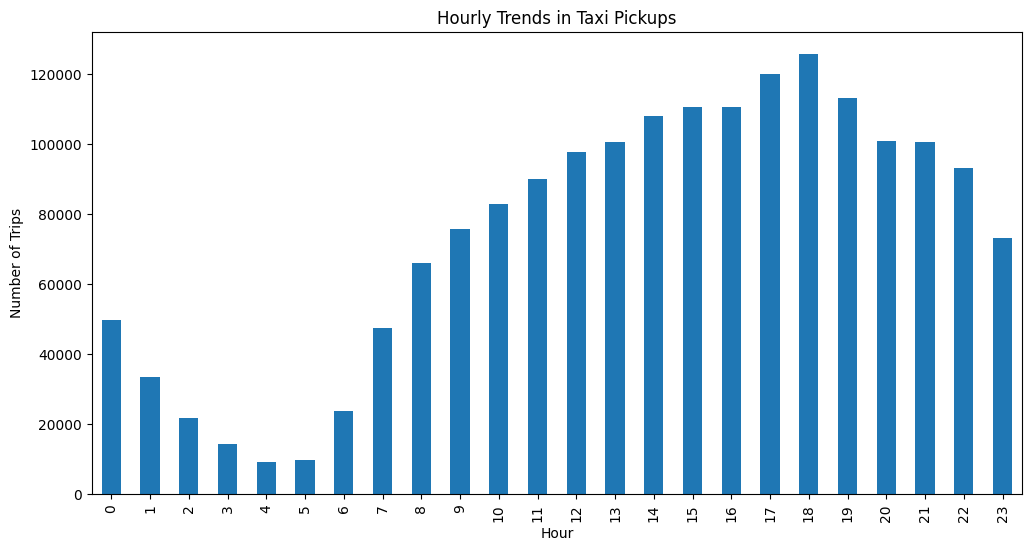

In [82]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = df.groupby(['pickup_hour']).size()
plt.figure(figsize=(12, 6))
hourly_trips.plot(kind="bar")
plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
df_hourly_trip = hourly_trips.reset_index(name='trip_count').sort_values(by='trip_count', ascending=False)
df_hourly_trip['trip_count'] = df_hourly_trip['trip_count']/0.05
df_hourly_trip


pickup_hour  trip_count
18           18   2029820.0
17           17   1908320.0
19           19   1829200.0
16           16   1707320.0
15           15   1682500.0
21           21   1651440.0
20           20   1640420.0
14           14   1634520.0
22           22   1525520.0
13           13   1511740.0
12           12   1473660.0
11           11   1354720.0
10           10   1250460.0
9             9   1181780.0
23           23   1173060.0
8             8   1061000.0
0             0    790880.0
7             7    744880.0
1             1    527200.0
6             6    345800.0
2             2    339420.0
3             3    211700.0
5             5    128560.0
4             4    121440.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Axes: title={'center': 'Hourly Trends in Taxi Pickups'}, xlabel='Hour', ylabel='Number of Trips'>

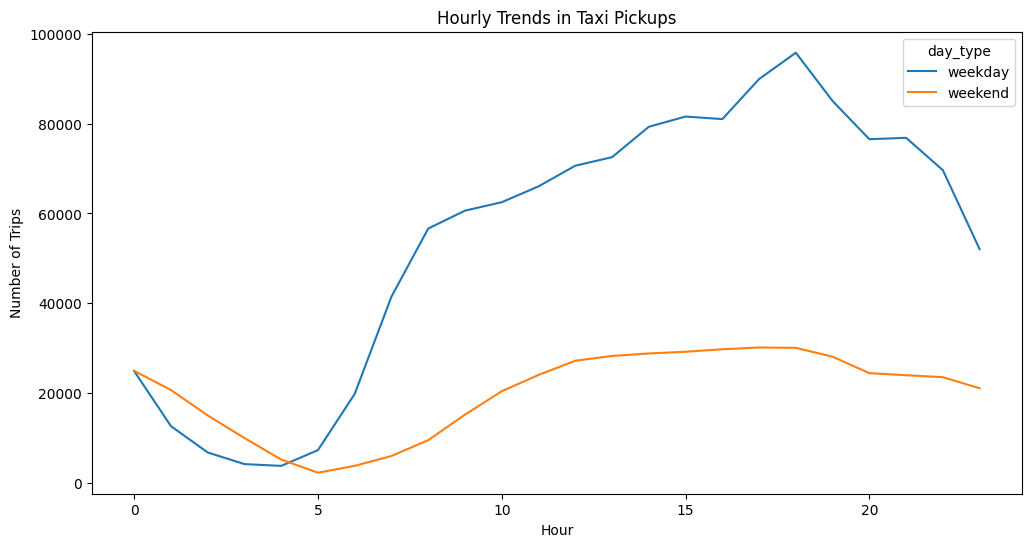

In [83]:
# Compare traffic trends for the week days and weekends

# add new column day_type
df['day_type'] = df['pickup_day'].apply(lambda x: 'weekend' if x in ['Sunday', 'Saturday'] else 'weekday')


df_hourly_traffice_based_day_type = df.groupby(['day_type', 'pickup_hour'])['tpep_pickup_datetime'].count().reset_index(name='trip_count')

# plot the graph using sns. df_hourly_traffice_based_day_type.plot doesn't take hue as arg
plt.figure(figsize=(12, 6))
plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
sns.lineplot(data=df_hourly_traffice_based_day_type, x='pickup_hour', y='trip_count', hue='day_type')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779217 entries, 0 to 1786975
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  pickup_hour            int3

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [86]:
# Find top 10 pickup and dropoff zones
df_pickup_zones_by_hour = df.groupby(['PULocationID','pickup_hour'])['tpep_pickup_datetime'].count().reset_index(name='pickup_count')

# find the total hourly pickup for each zone
mean_hourly_pickups_by_zone = df_pickup_zones_by_hour.groupby(['PULocationID'])['pickup_count'].mean().reset_index(name="mean_hourly_pickups")

# sort based on total_hourly_pickups and find the top 10 zones
top_10_zones_by_total_hourly_pickups = mean_hourly_pickups_by_zone.sort_values(by='mean_hourly_pickups', ascending=False).head(10)

#show the top 10 zone which has high total hourly pickup
top_10_zones_by_total_hourly_pickups


PULocationID  mean_hourly_pickups
124           132          3911.875000
226           237          3541.750000
153           161          3499.458333
225           236          3154.416667
154           162          2674.000000
130           138          2624.583333
177           186          2577.958333
219           230          2492.291667
134           142          2476.666667
162           170          2215.791667

In [91]:
# merge top_10_zones_by_total_hourly_pickups with zones data using inner join
top_10_zones_by_total_hourly_pickups_1 = top_10_zones_by_total_hourly_pickups.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')
top_10_zones_by_total_hourly_pickups_1[['zone','mean_hourly_pickups']]

zone  mean_hourly_pickups
0                   JFK Airport          3911.875000
1         Upper East Side South          3541.750000
2                Midtown Center          3499.458333
3         Upper East Side North          3154.416667
4                  Midtown East          2674.000000
5             LaGuardia Airport          2624.583333
6  Penn Station/Madison Sq West          2577.958333
7     Times Sq/Theatre District          2492.291667
8           Lincoln Square East          2476.666667
9                   Murray Hill          2215.791667

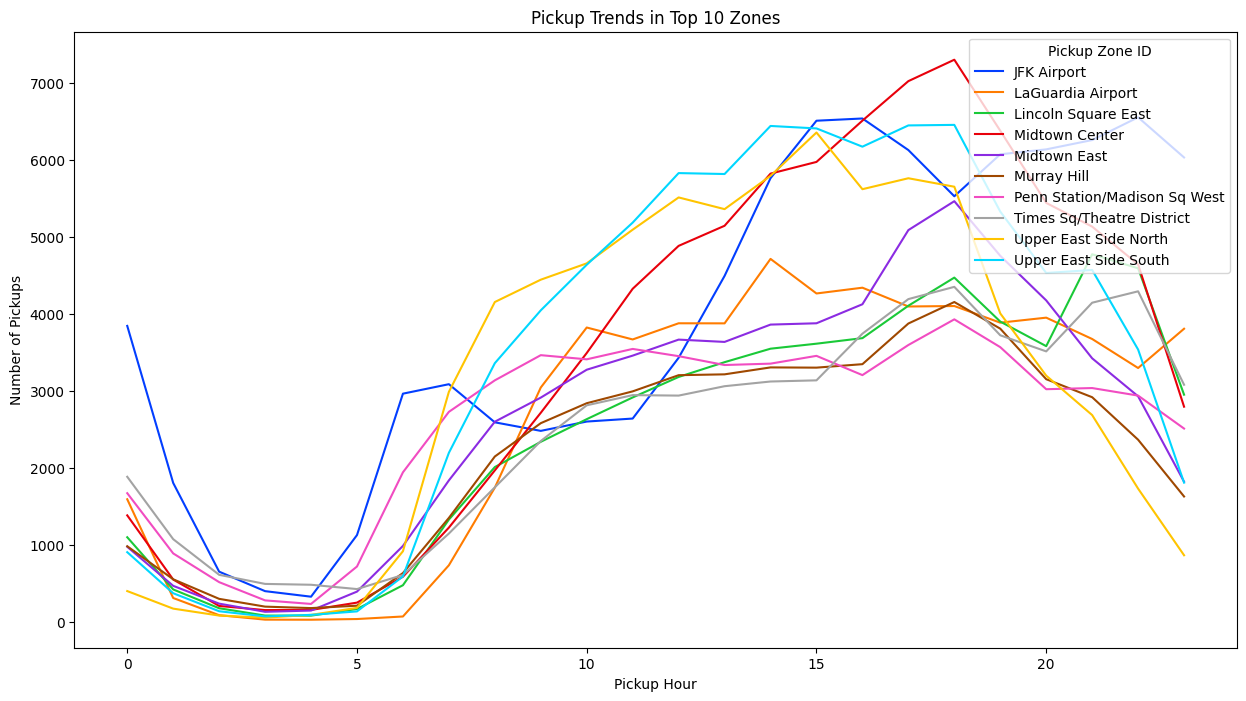

In [92]:
# Assuming you have 'top_10_zones_per_hour' from the previous step

# 1. Create a subset of your original data containing only the top 10 zones:
top_10_zones_data = df[df['PULocationID'].isin(top_10_zones_by_total_hourly_pickups['PULocationID'].unique())]

# merge top_10_zones_data with zones
top_10_zones_data = top_10_zones_data.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')

# 2. Create the plot:
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.lineplot(x='pickup_hour', y='pickup_count', hue='zone', data=top_10_zones_data.groupby(['zone', 'pickup_hour'])['tpep_pickup_datetime'].count().reset_index(name='pickup_count'), palette='bright') #pallet for colour
plt.title('Pickup Trends in Top 10 Zones')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone ID', loc='upper right')  # Adjust legend location as needed
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

<Axes: title={'center': 'Top 10 Pickup/Dropoff Ratios'}, xlabel='zone', ylabel='Pickup/Dropoff Ratio'>

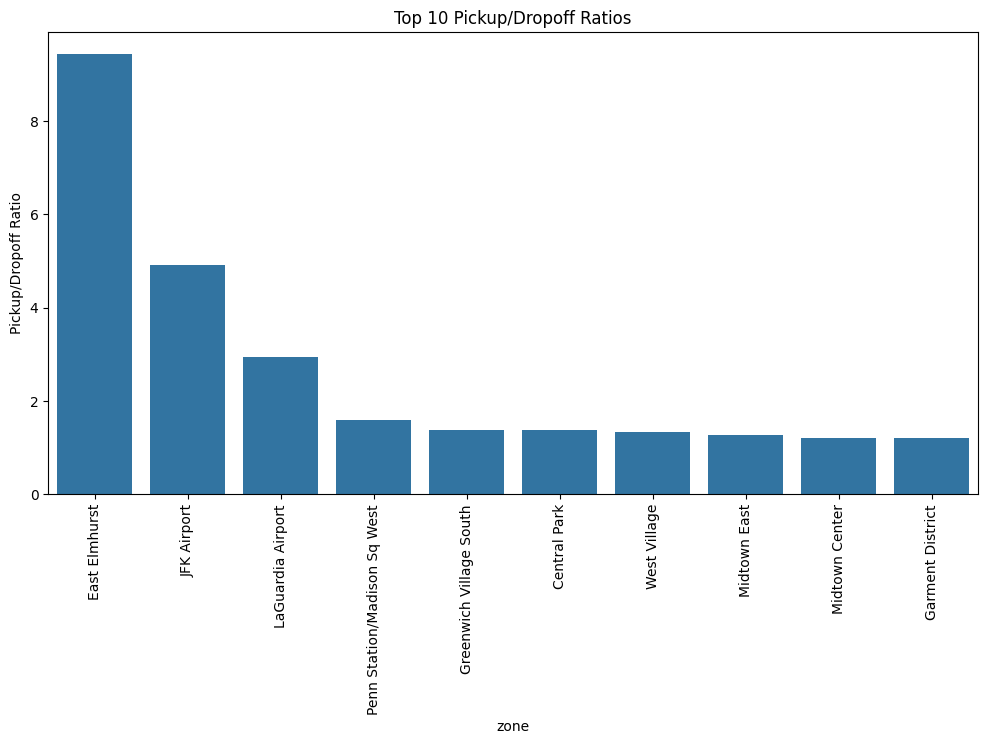

In [101]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df_pickups_by_zones = df.groupby(['PULocationID'])['tpep_pickup_datetime'].count().reset_index(name='pickup_count')
df_dropoffs_by_zones = df.groupby(['DOLocationID'])['tpep_dropoff_datetime'].count().reset_index(name='dropoff_count')

# merge df_pickups_by_zones and df_dropoffs_by_zones based on PULocationID
df_zones_by_pickups_and_dropoffs = df_pickups_by_zones.merge(df_dropoffs_by_zones, how='inner', right_on='DOLocationID', left_on='PULocationID', suffixes=('_pickup', '_dropoff'))

# create acolumn for pickup_count/dropoff_count
df_zones_by_pickups_and_dropoffs['pickup_dropoff_ratio'] = df_zones_by_pickups_and_dropoffs['pickup_count']/df_zones_by_pickups_and_dropoffs['dropoff_count']

# top 10 pickup/dropoff ratios
df_zones_by_pickups_and_dropoffs.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# merge df_zones_by_pickups_and_dropoffs with zone
df_zones_by_pickups_and_dropoffs = df_zones_by_pickups_and_dropoffs.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')

# create a graph for the top 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.xlabel("zone")
plt.ylabel("Pickup/Dropoff Ratio")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
sns.barplot(df_zones_by_pickups_and_dropoffs.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10), x='zone', y='pickup_dropoff_ratio')

<Axes: title={'center': 'Bottom 10 Pickup/Dropoff Ratios'}, xlabel='zone', ylabel='Pickup/Dropoff Ratio'>

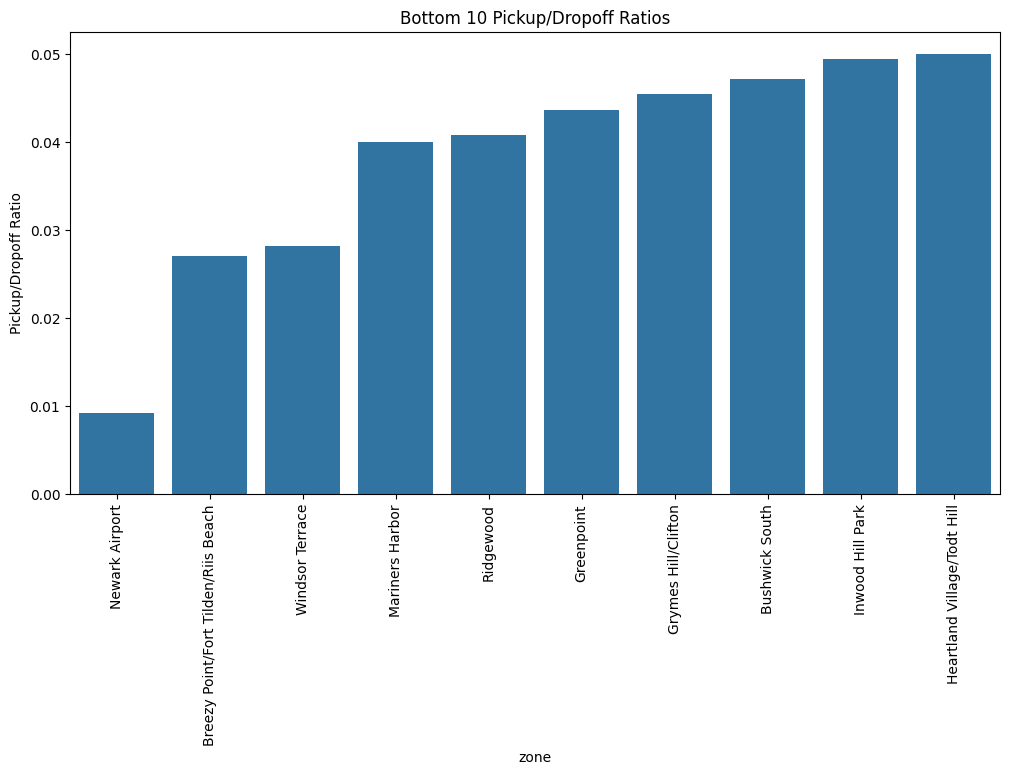

In [108]:
# bottom 10  pickup/dropoff ratios
df_zones_by_pickups_and_dropoffs.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# create a graph of lowest pickup/dropoff ratios
plt.figure(figsize=(12, 6))
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.xlabel("zone")
plt.ylabel("Pickup/Dropoff Ratio")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
sns.barplot(df_zones_by_pickups_and_dropoffs.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10), x='zone', y='pickup_dropoff_ratio')

In [105]:
df_zones_by_pickups_and_dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PULocationID          250 non-null    int64   
 1   pickup_count          250 non-null    int64   
 2   DOLocationID          250 non-null    int64   
 3   dropoff_count         250 non-null    int64   
 4   pickup_dropoff_ratio  250 non-null    float64 
 5   OBJECTID              250 non-null    int32   
 6   Shape_Leng            250 non-null    float64 
 7   Shape_Area            250 non-null    float64 
 8   zone                  250 non-null    object  
 9   LocationID            250 non-null    int32   
 10  borough               250 non-null    object  
 11  geometry              250 non-null    geometry
 12  trip_count            250 non-null    int64   
dtypes: float64(3), geometry(1), int32(2), int64(5), object(2)
memory usage: 23.6+ KB


In [98]:
df_zones_by_pickups_and_dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PULocationID          252 non-null    int64   
 1   pickup_count          252 non-null    int64   
 2   DOLocationID          252 non-null    int64   
 3   dropoff_count         252 non-null    int64   
 4   pickup_dropoff_ratio  252 non-null    float64 
 5   OBJECTID_x            252 non-null    int32   
 6   Shape_Leng_x          252 non-null    float64 
 7   Shape_Area_x          252 non-null    float64 
 8   zone_x                252 non-null    object  
 9   LocationID_x          252 non-null    int32   
 10  borough_x             252 non-null    object  
 11  geometry_x            252 non-null    geometry
 12  trip_count_x          252 non-null    int64   
 13  OBJECTID_y            252 non-null    int32   
 14  Shape_Leng_y          252 non-null    float64 
 15  Shape_

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

<Axes: title={'center': 'Top 10 Pickup/Dropoff Ratios in Night Hours'}, xlabel='zone', ylabel='Pickup/Dropoff Ratio'>

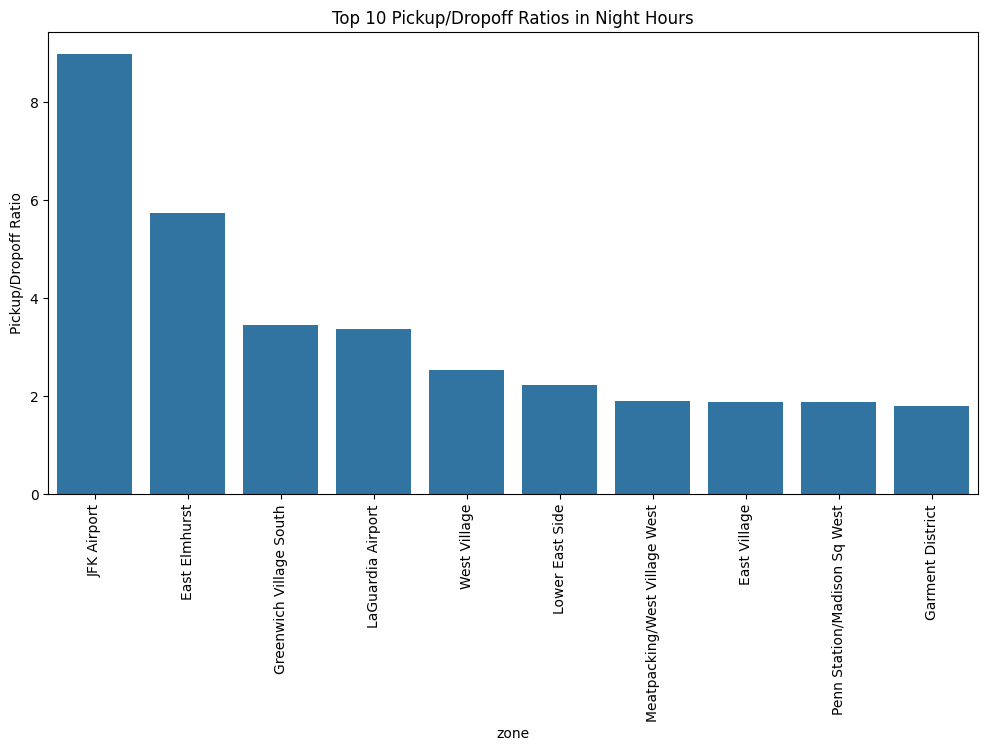

In [111]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# filter the data by ight hours (11pm to 5am)
df_by_night_hour = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# zones by pickups
df_night_hour_zones_by_pickups = df_by_night_hour.groupby(['PULocationID'])['tpep_pickup_datetime'].count().reset_index(name='pickup_count')
# zones by drop off
df_night_hour_zones_by_dropoffs = df_by_night_hour.groupby(['DOLocationID'])['tpep_dropoff_datetime'].count().reset_index(name='dropoff_count')

# merge zones by ID
df_night_hour_zones_by_pickups_and_dropoffs = df_night_hour_zones_by_pickups.merge(df_night_hour_zones_by_dropoffs, how='inner', left_on='PULocationID', right_on='DOLocationID', suffixes=('_pickup', '_dropoff'))

# add a column for pickup and dropffs ratio
df_night_hour_zones_by_pickups_and_dropoffs['pickup_dropoff_ratio'] = df_night_hour_zones_by_pickups_and_dropoffs['pickup_count']/df_night_hour_zones_by_pickups_and_dropoffs['dropoff_count']

# find the top 10 zones by pickup and dropffs ratio
df_night_hour_top_10_zones_by_pickups_and_dropoffs = df_night_hour_zones_by_pickups_and_dropoffs.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10).reset_index(drop=True)
df_night_hour_top_10_zones_by_pickups_and_dropoffs

#merge df_night_hour_top_10_zones_by_pickups_and_dropoffs with zone
df_night_hour_top_10_zones_by_pickups_and_dropoffs = df_night_hour_top_10_zones_by_pickups_and_dropoffs.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')

# create a graph of pickup_dropoff_ratio of top 10 zones nightly
plt.figure(figsize=(12, 6))
plt.title("Top 10 Pickup/Dropoff Ratios in Night Hours")
plt.xlabel("zone")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.ylabel("Pickup/Dropoff Ratio")
sns.barplot(df_night_hour_top_10_zones_by_pickups_and_dropoffs, x='zone', y='pickup_dropoff_ratio')

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

# filter for night hours
df_night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# hourly revenue in night
df_night_hourly_revenue = df_night_hours.groupby(['pickup_hour'])['total_amount'].sum().reset_index(name='night_hourly_revenue')

# night revenue share ~ 12%
df_night_hourly_revenue['night_hourly_revenue'].sum()*100/df['total_amount'].sum()



np.float64(11.967694206337649)

In [ ]:
# find the day hour revenue share
df_day_hours = df[(df['pickup_hour'] > 5) & (df['pickup_hour'] < 23)]

# hourly revenu in day
df_day_hourly_revenue = df_day_hours.groupby(['pickup_hour'])['total_amount'].sum().reset_index(name='day_hourly_revenue')

# day revenue share ~ 88%
df_day_hourly_revenue['day_hourly_revenue'].sum()*100/df['total_amount'].sum()

np.float64(88.03230579366233)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

<Axes: title={'center': 'Average Fare per Mile per Passenger'}, xlabel='Passenger Count', ylabel='Average Fare per Mile'>

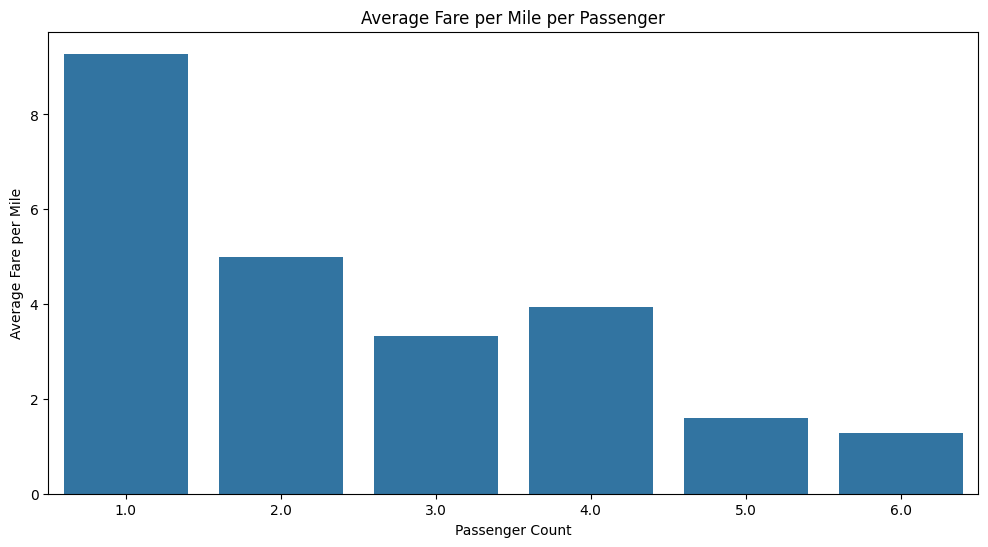

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

# filter the records where trip_distance is non zero
df_non_zero_trip_distance = df[df['trip_distance'] != 0]

# get fare_per_mile for different trips
df_non_zero_trip_distance['fare_per_mile'] = df_non_zero_trip_distance['fare_amount']/df_non_zero_trip_distance['trip_distance']

# get average fare per mile for each passenger
df_avg_fare_per_mile_by_passenger_count = df_non_zero_trip_distance.groupby(['passenger_count'])['fare_per_mile'].mean().reset_index(name='average_fare_per_mile')

df_avg_fare_per_mile_by_passenger_count['avg_fare_per_mile_per_passsenger'] = df_avg_fare_per_mile_by_passenger_count['average_fare_per_mile']/df_avg_fare_per_mile_by_passenger_count['passenger_count']

df_avg_fare_per_mile_by_passenger_count

# create a graph for average fare per mile for each passenger
plt.figure(figsize=(12, 6))
plt.title("Average Fare per Mile per Passenger")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile")
sns.barplot(df_avg_fare_per_mile_by_passenger_count, x='passenger_count', y='avg_fare_per_mile_per_passsenger')


Text(0, 0.5, 'Average Fare per Mile')

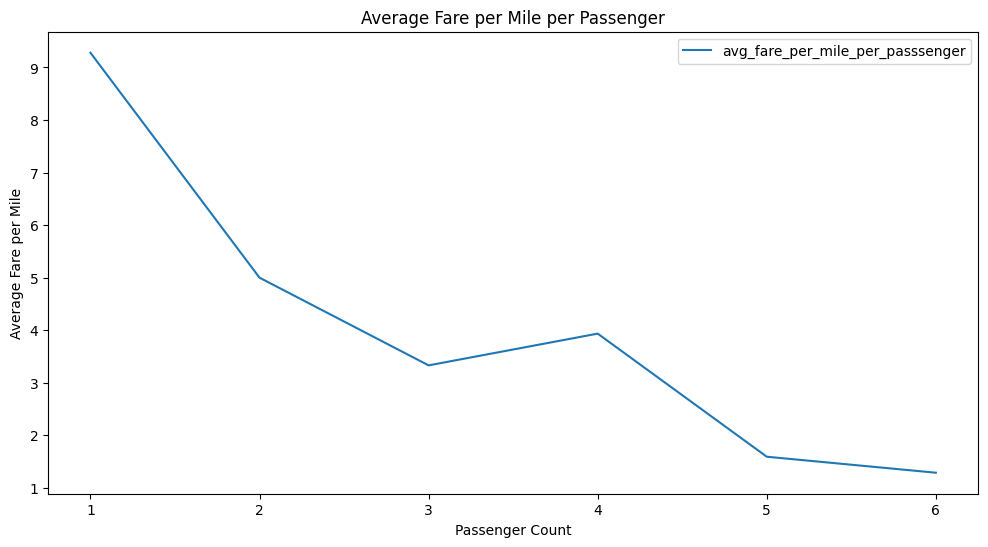

In [ ]:
df_avg_fare_per_mile_by_passenger_count.plot(kind='line', x='passenger_count', y='avg_fare_per_mile_per_passsenger',figsize=(12,6))
plt.title("Average Fare per Mile per Passenger")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile")

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

# filter by non zero trip distance
df_non_zero_trip_distance = df[df['trip_distance'] != 0]

# find average fare per mile for each trip
df_non_zero_trip_distance['fare_per_mile'] = df_non_zero_trip_distance['fare_amount']/df_non_zero_trip_distance['trip_distance']

# find avg fare by day and by time
df_avg_fare_per_mile_by_day_by_hour = df_non_zero_trip_distance.groupby(['pickup_day', 'pickup_hour'])['fare_per_mile'].mean().reset_index(name='average_fare_per_mile')


df_avg_fare_per_mile_by_day_by_hour



pickup_day  pickup_hour  average_fare_per_mile
0       Friday            0               6.890821
1       Friday            1               7.274340
2       Friday            2               9.539721
3       Friday            3               8.525206
4       Friday            4              10.380135
..         ...          ...                    ...
163  Wednesday           19               9.085671
164  Wednesday           20               8.180763
165  Wednesday           21               6.944736
166  Wednesday           22               7.698959
167  Wednesday           23               7.388800

[168 rows x 3 columns]

<Axes: title={'center': 'Average Fare per Mile by Day and Hour'}, xlabel='Hour', ylabel='Average Fare per Mile'>

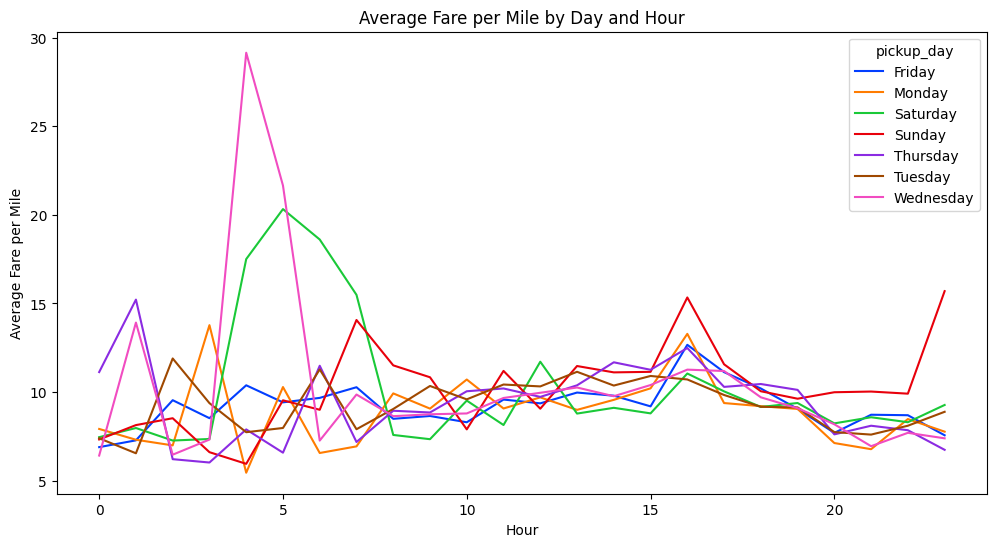

In [ ]:
# compare the average fare per mile for different days and for different times of the day

# df_avg_fare_by_day_by_hour.plot(kind='line', x='pickup_hour',y='average_fare_per_mile', hue='pickup_day', pallet='bright')

plt.figure(figsize=(12, 6))
plt.title("Average Fare per Mile by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Average Fare per Mile")

sns.lineplot(data=df_avg_fare_per_mile_by_day_by_hour, x='pickup_hour',y='average_fare_per_mile', hue='pickup_day', palette='bright')


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors


# filter by non zero trip distance
df_non_zero_trip_distance = df[df['trip_distance'] != 0]

# find average fare per mile for each trip
df_non_zero_trip_distance['fare_per_mile'] = df_non_zero_trip_distance['fare_amount']/df_non_zero_trip_distance['trip_distance']

# find avg fare by vendor and by hour
df_avg_fare_per_mile_by_vendor_by_hour = df_non_zero_trip_distance.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index(name='average_fare_per_mile')


df_avg_fare_per_mile_by_vendor_by_hour


VendorID  pickup_hour  average_fare_per_mile
0          1            0               6.680033
1          1            1               6.761314
2          1            2               6.859530
3          1            3               6.350188
4          1            4               7.047668
5          1            5               7.191032
6          1            6               6.373329
7          1            7               6.995602
8          1            8               7.917343
9          1            9               8.251627
10         1           10               8.206814
11         1           11               8.525003
12         1           12               8.609346
13         1           13               8.517659
14         1           14               8.523905
15         1           15               8.542131
16         1           16               8.679222
17         1           17               8.481920
18         1           18               8.252921
19         1           19               7.715780
20         1           20               7.239487
21         1           21               7.050710
22         1           22               6.792311
23         1           23               6.693212
24         2            0               7.945001
25         2            1               9.282134
26         2            2               8.337885
27         2            3               7.716387
28         2            4              12.579278
29         2            5              13.458615
30         2            6              11.331863
31         2            7               9.903225
32         2            8               9.444427
33         2            9               9.412014
34         2           10               9.669830
35         2           11              10.181817
36         2           12              10.455728
37         2           13              10.721669
38         2           14              10.786773
39         2           15              10.862627
40         2           16              13.553152
41         2           17              11.131145
42         2           18              10.184212
43         2           19               9.855526
44         2           20               8.242563
45         2           21               8.268208
46         2           22               8.742516
47         2           23               9.129988

Text(0, 0.5, 'Average Fare per Mile')

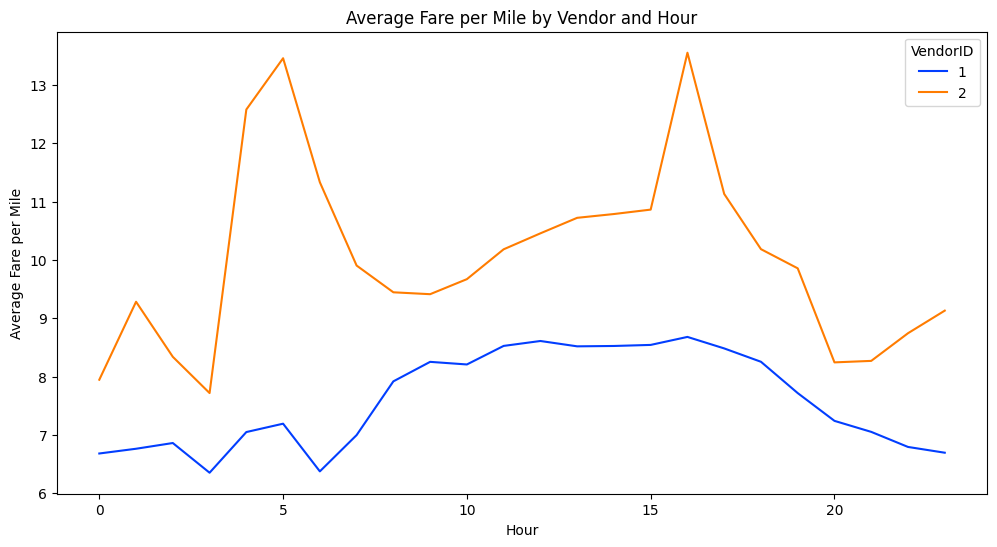

In [ ]:
# Compare fare per mile for different vendors
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg_fare_per_mile_by_vendor_by_hour, x='pickup_hour', y='average_fare_per_mile', hue='VendorID', palette='bright')
plt.title("Average Fare per Mile by Vendor and Hour")
plt.xlabel("Hour")
plt.ylabel("Average Fare per Mile")


In [ ]:
df['VendorID'].unique()

array([2, 1])

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

# add a new column for distance tiers. If (trip_distance > 0 & trip_distance <= 2) then distance_tier = 'upto 2 miles' else if (trip_distance > 2 & trip_distance <= 5) then distance_tier = '2 to 5 miles' else distance_tier = 'more than 5 miles'
df_non_zero_trip_distance['distance_tier'] = df_non_zero_trip_distance.apply(lambda x: 'upto 2 miles' if x['trip_distance'] <= 2 else '2 to 5 miles' if x['trip_distance'] <= 5 else 'more than 5 miles', axis=1)




In [ ]:
# find the avg fare per mile by vendor by distance_tier
df_avg_fare_per_mile_by_vendor_by_distance_tier = df_non_zero_trip_distance.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index(name='average_fare_per_mile')
df_avg_fare_per_mile_by_vendor_by_distance_tier

VendorID      distance_tier  average_fare_per_mile
0         1       2 to 5 miles               6.355195
1         1  more than 5 miles               4.470793
2         1       upto 2 miles               9.513499
3         2       2 to 5 miles               6.547440
4         2  more than 5 miles               4.505167
5         2       upto 2 miles              13.589658

<Axes: title={'center': 'Average Fare per Mile by Vendor and Distance Tier'}, xlabel='Distance Tier', ylabel='Average Fare per Mile'>

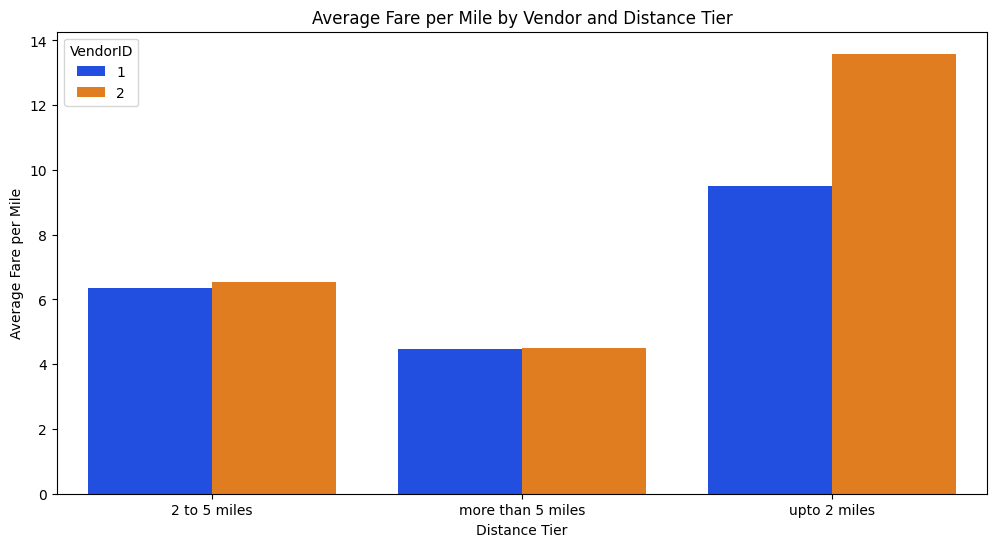

In [ ]:
# compare the avg fare per mile by vendor by distance_tier
plt.figure(figsize=(12, 6))
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile")
sns.barplot(data=df_avg_fare_per_mile_by_vendor_by_distance_tier, x='distance_tier', y='average_fare_per_mile', hue='VendorID', palette='bright')

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

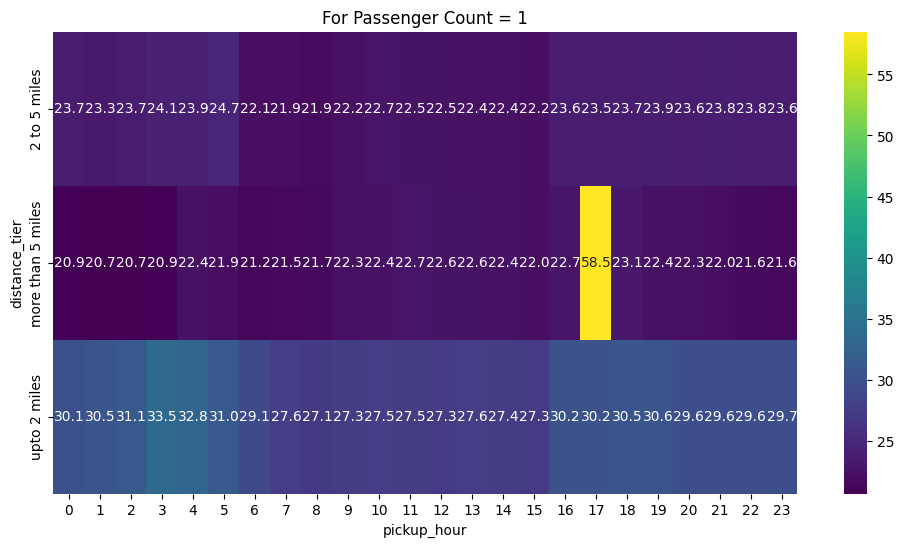

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# create a new col for tip_percentage
df_non_zero_trip_distance['tip_percentage'] = (df_non_zero_trip_distance['tip_amount'] *100 / df_non_zero_trip_distance['fare_amount'])

# for 1 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_1 = pd.pivot_table(df_non_zero_trip_distance[df_non_zero_trip_distance['passenger_count'] == 1], values='tip_percentage', index='distance_tier', columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_1, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 1')
plt.show()


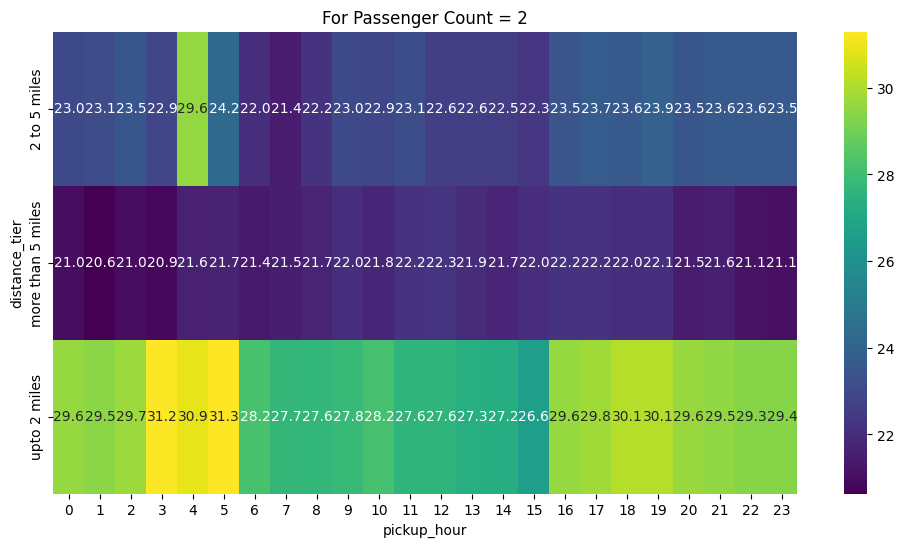

In [ ]:
# for 2 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_2 = pd.pivot_table(df_non_zero_trip_distance[df_non_zero_trip_distance['passenger_count'] == 2], values='tip_percentage', index='distance_tier', columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_2, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 2')
plt.show()

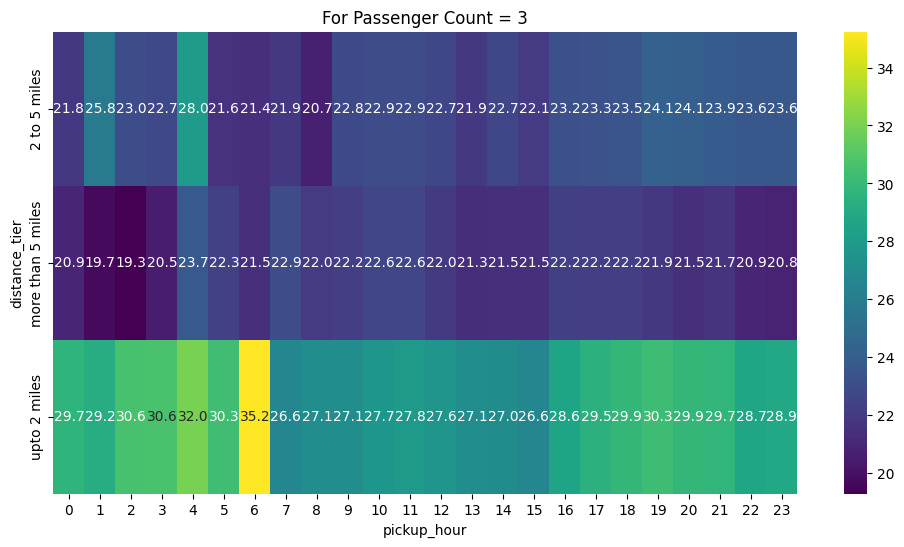

In [ ]:
# for 3 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_3 = pd.pivot_table(df_non_zero_trip_distance[df_non_zero_trip_distance['passenger_count'] == 3], values='tip_percentage', index='distance_tier', columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_3, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 3')
plt.show()

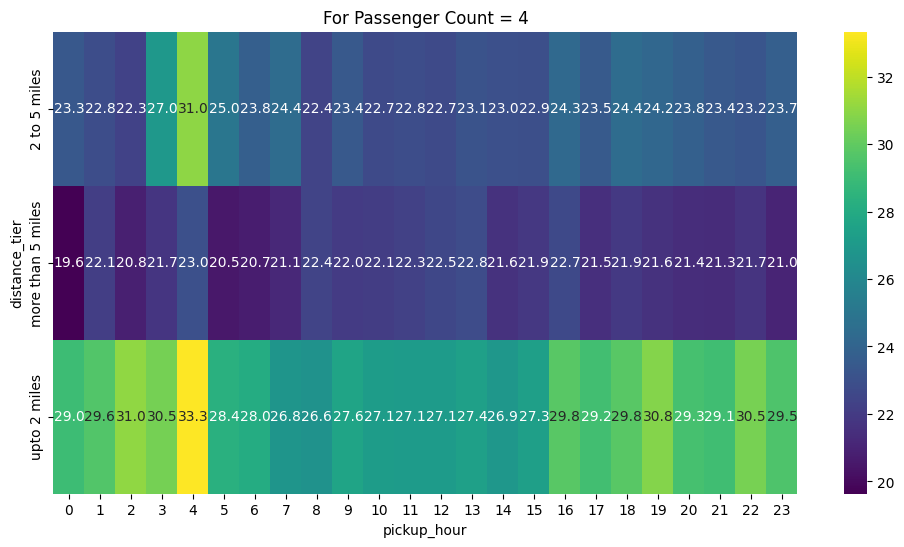

In [ ]:
# for 4 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_4 = pd.pivot_table(df_non_zero_trip_distance[df_non_zero_trip_distance['passenger_count'] == 4], values='tip_percentage', index='distance_tier', columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_4, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 4')
plt.show()

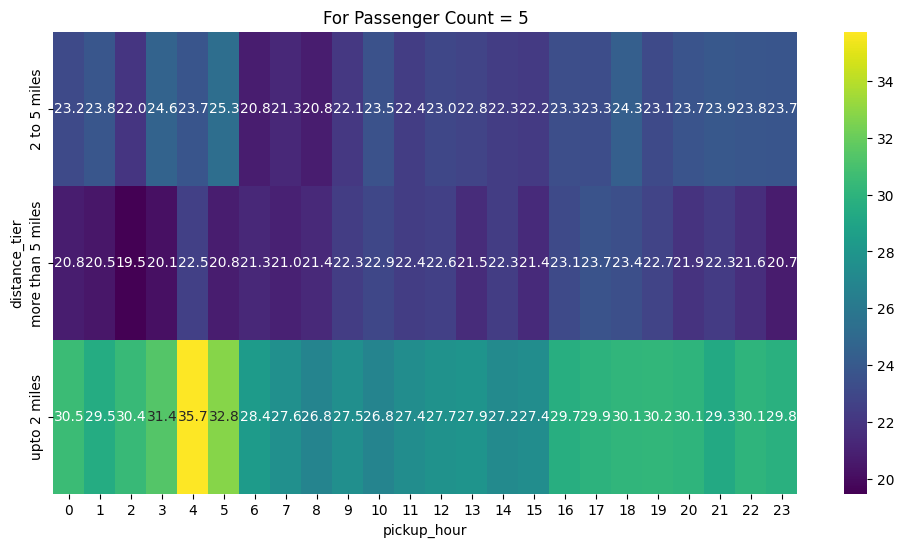

In [ ]:
# for 5 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_5 = pd.pivot_table(df_non_zero_trip_distance[df_non_zero_trip_distance['passenger_count'] == 5], values='tip_percentage', index='distance_tier', columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_5, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 5')
plt.show()

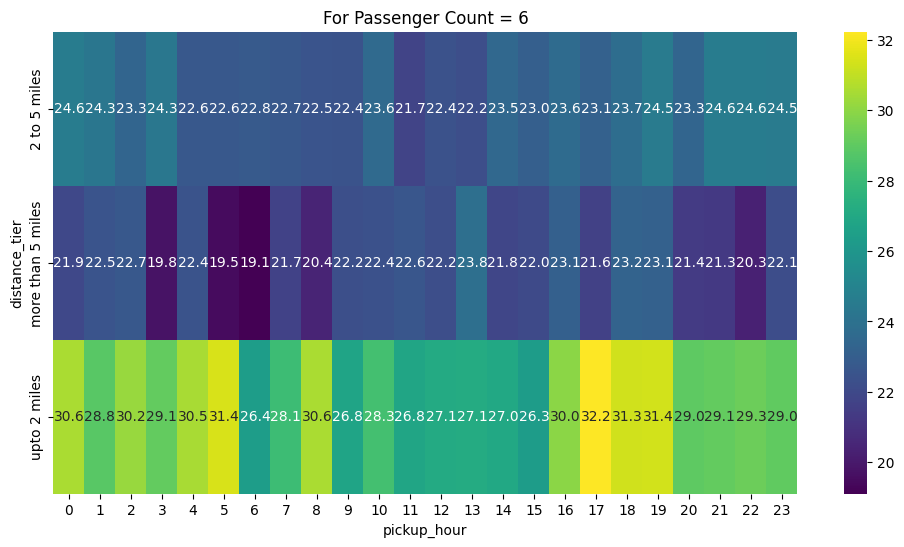

In [ ]:
# for 6 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_6 = pd.pivot_table(df_non_zero_trip_distance[df_non_zero_trip_distance['passenger_count'] == 6], values='tip_percentage', index='distance_tier', columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_6, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 6')
plt.show()

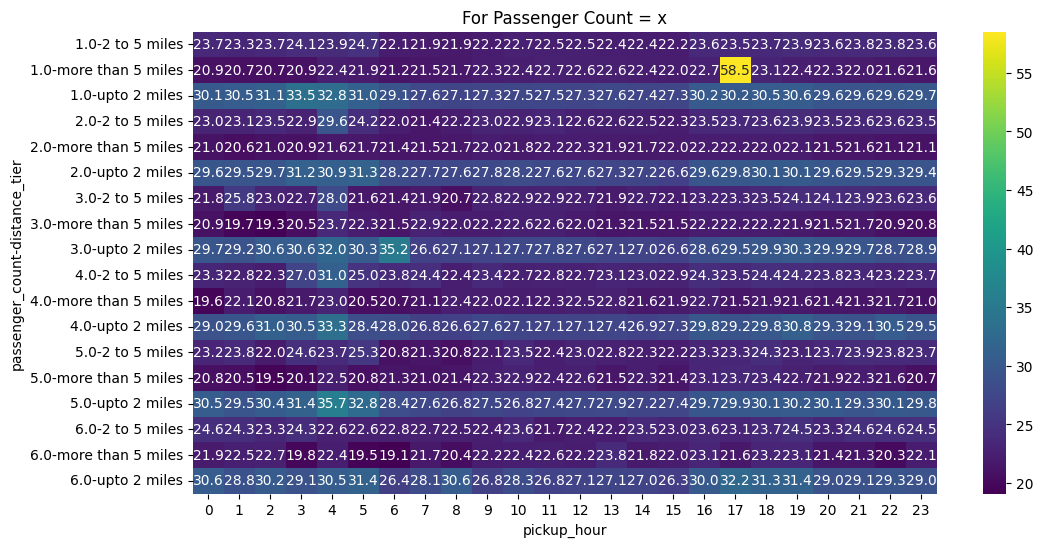

In [ ]:
# for 6 passenger create a heat map for tip percentages based on distance_tier and pickup times
pass_x = pd.pivot_table(df_non_zero_trip_distance, values='tip_percentage', index=['passenger_count','distance_tier'], columns='pickup_hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pass_x, annot=True,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = x')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

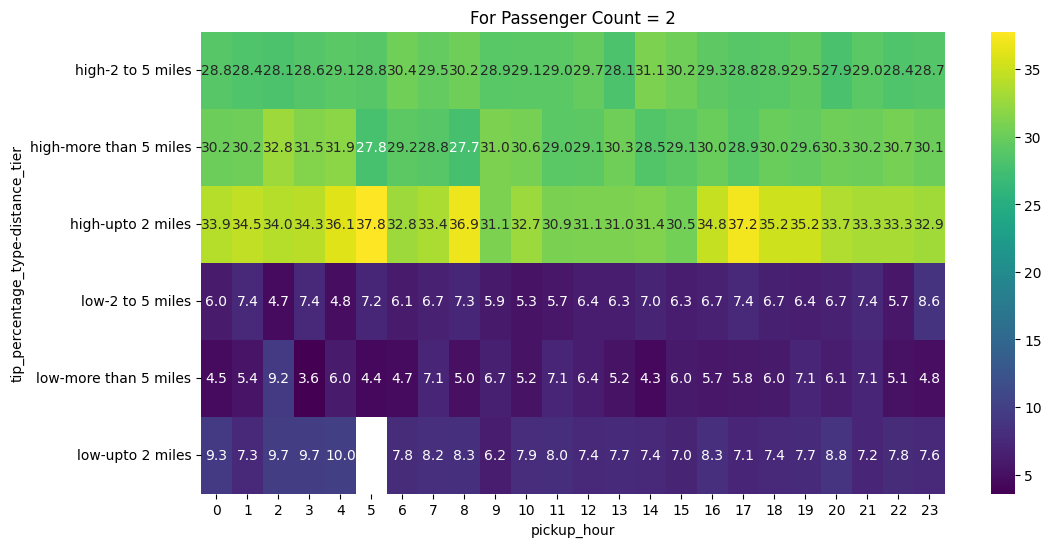

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# create a new column as tip_percentage_type. If tip_percentage <10 then tip_percentage_type = low else if (tip_percentage >= 10 & tip_percentage < 25) than tip_percentage_type=mid else tip_percentage_type=high
df_non_zero_trip_distance['tip_percentage_type'] = df_non_zero_trip_distance['tip_percentage'].apply(lambda x: "low" if x <= 10.0 else "mid" if x<25.0 else "high")

# filter df where tip_percentage_type is low or high
df_filtered_low_or_high_tip = df_non_zero_trip_distance[df_non_zero_trip_distance['tip_percentage_type'].isin(['low', 'high'])]


#plot a heat map for passenger = 2
pass_2_with_tip_percentage_type = pd.pivot_table(df_filtered_low_or_high_tip[df_filtered_low_or_high_tip['passenger_count'] == 6], values='tip_percentage', index=['tip_percentage_type','distance_tier'], columns='pickup_hour', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pass_2_with_tip_percentage_type, annot=True ,cmap='viridis', fmt=".1f")
plt.title('For Passenger Count = 2')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

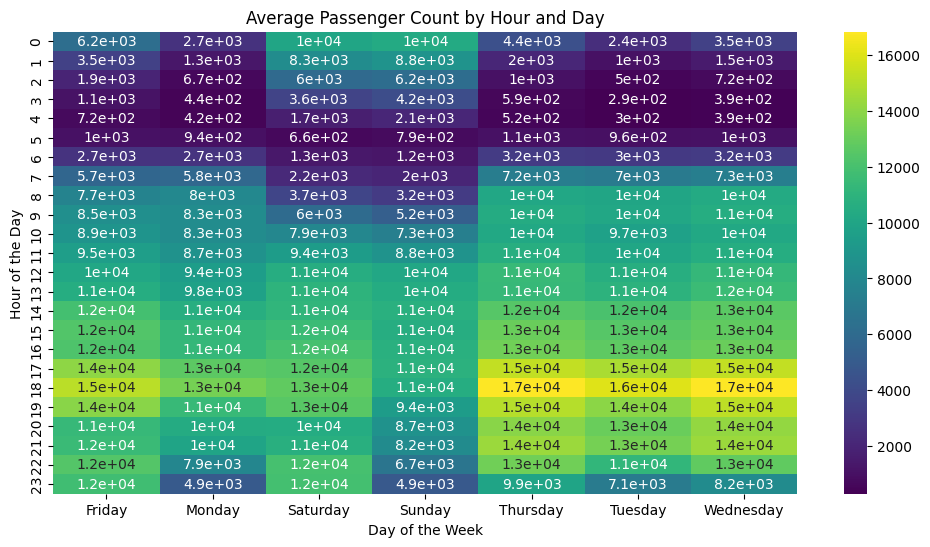

In [ ]:
# See how passenger count varies across hours and days

passenger_count_by_hour_day = df_non_zero_trip_distance.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].size().reset_index(name='avg_passenger_count')
passenger_count_pivot = pd.pivot_table(passenger_count_by_hour_day, index='pickup_hour', columns='pickup_day', values='avg_passenger_count')
passenger_count_pivot

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(passenger_count_pivot, annot=True, cmap='viridis')
plt.title('Average Passenger Count by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


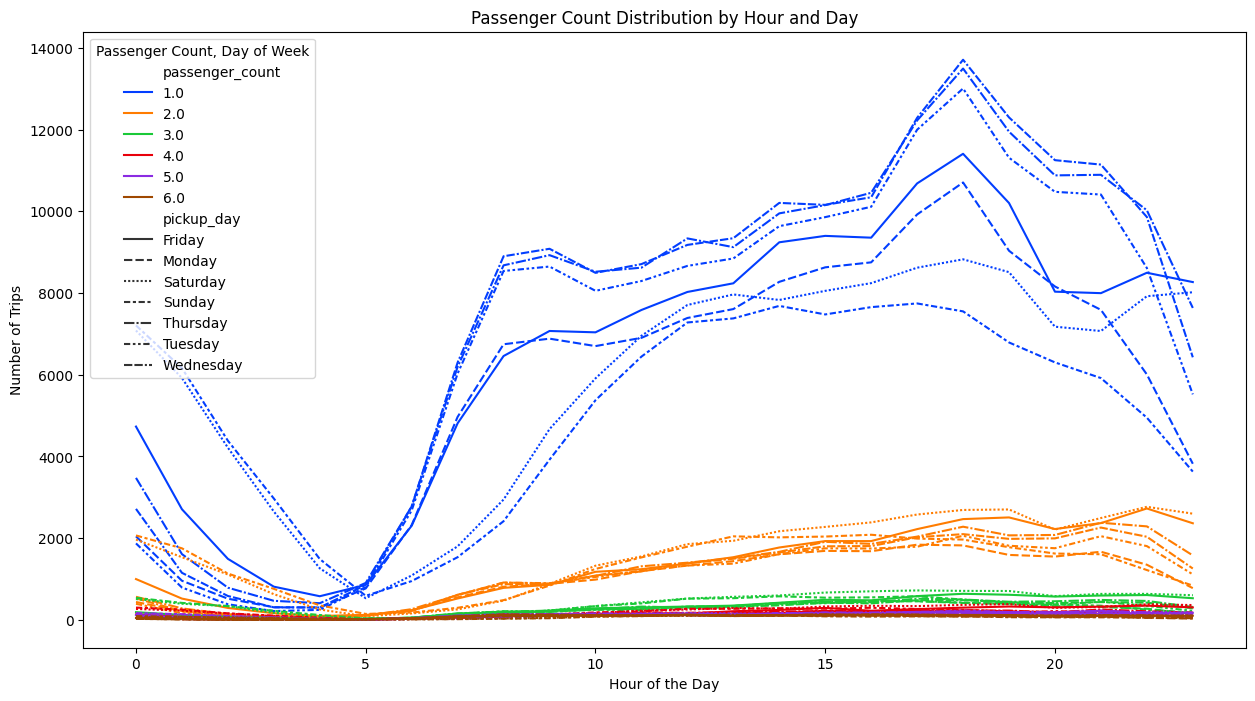

In [ ]:
## Group data by hour, day, and passenger count, then calculate trip counts
passenger_count_by_hour_day = df.groupby(['pickup_hour', 'pickup_day', 'passenger_count'])['passenger_count'].count().reset_index(name='trip_count')

# Create line plot with hue based on passenger count
plt.figure(figsize=(15, 8))
sns.lineplot(data=passenger_count_by_hour_day, x='pickup_hour', y='trip_count', hue='passenger_count', style='pickup_day',palette='bright')
plt.title('Passenger Count Distribution by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Passenger Count, Day of Week')
plt.show()

In [ ]:
df_temp = df.copy()

In [ ]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    224 non-null    int32   
 1   Shape_Leng  224 non-null    float64 
 2   Shape_Area  224 non-null    float64 
 3   zone        224 non-null    object  
 4   LocationID  224 non-null    int32   
 5   borough     224 non-null    object  
 6   geometry    224 non-null    geometry
 7   trip_count  224 non-null    int64   
dtypes: float64(2), geometry(1), int32(2), int64(1), object(2)
memory usage: 12.4+ KB


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

# merge zones into df_temp
df_merged_with_zones = df_temp.merge(zones, how='inner', left_on='PULocationID', right_on='LocationID')

Text(0.5, 1.0, 'Passenger Count by Zone and Day of Week')

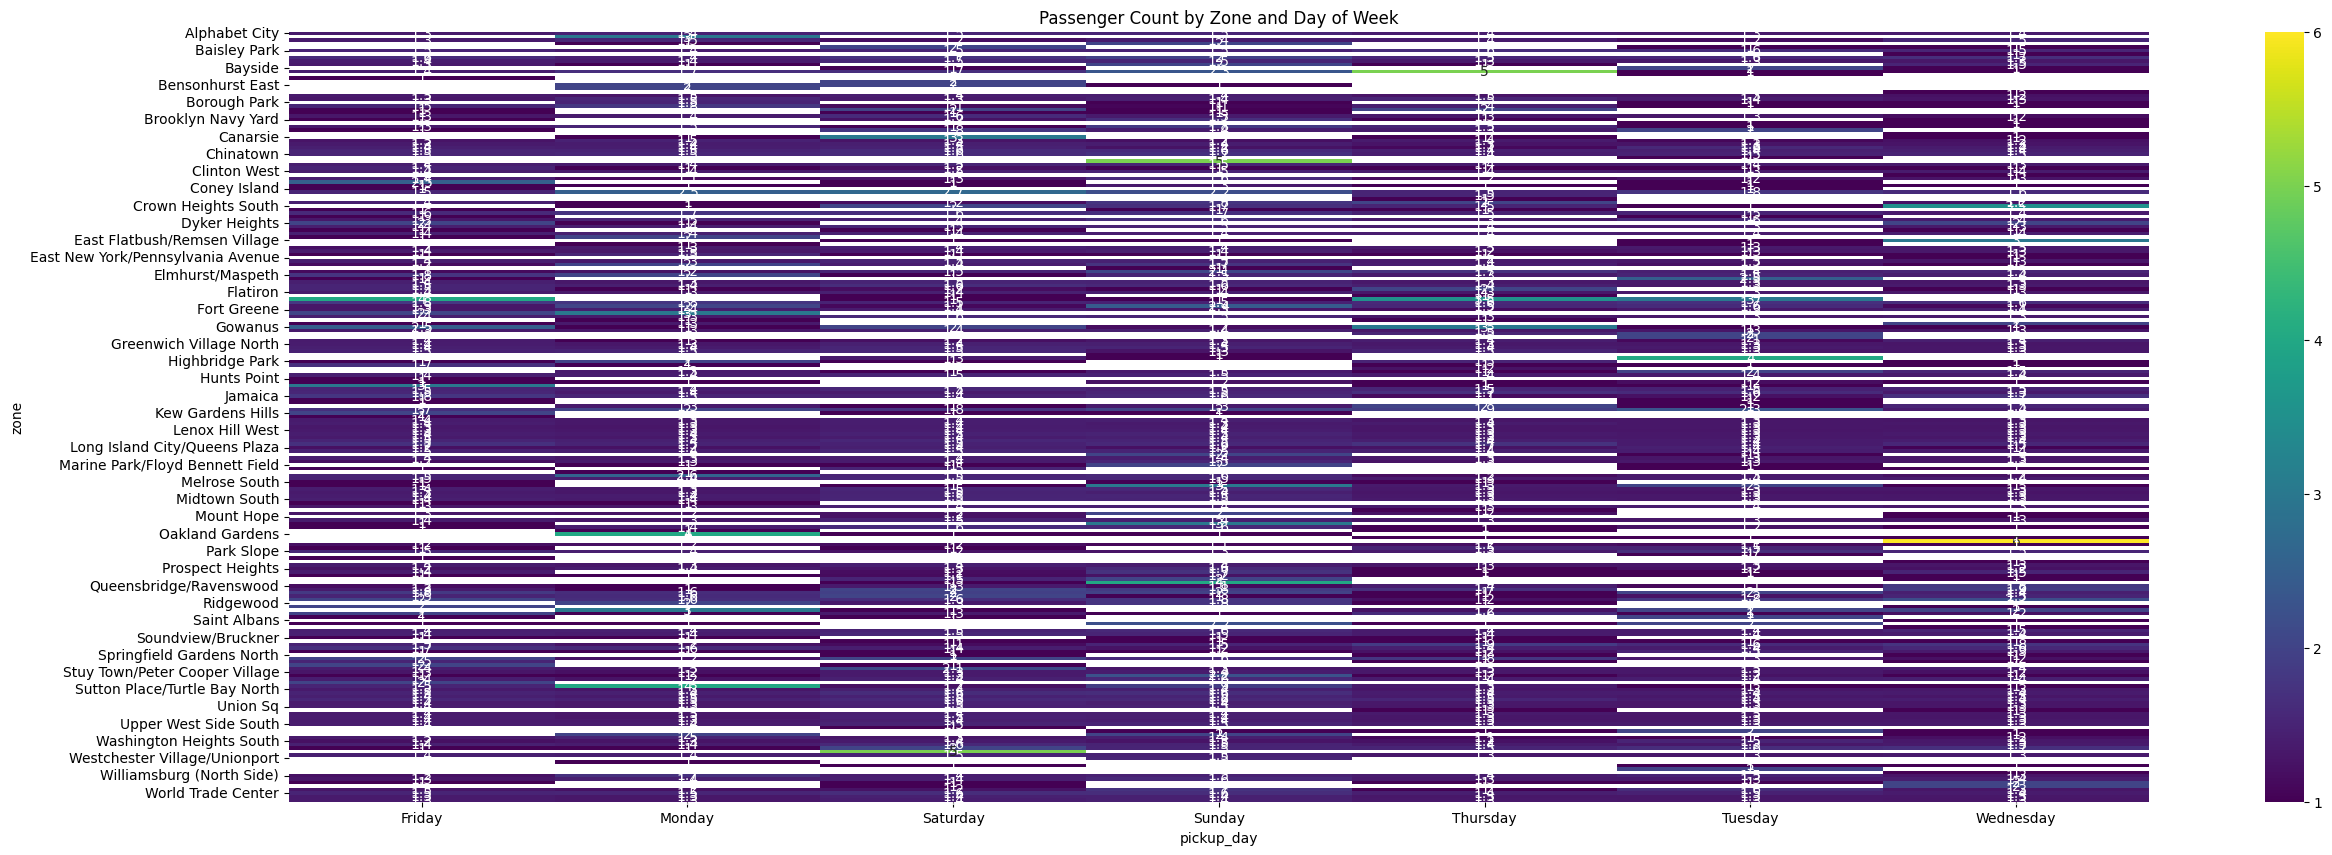

In [ ]:
zones_px_count_by_day = pd.pivot_table(df_merged_with_zones, values='passenger_count', index='zone', columns='pickup_day', aggfunc='mean')
plt.figure(figsize=(30, 10))
sns.heatmap(zones_px_count_by_day, annot=True, cmap='viridis')
plt.title('Passenger Count by Zone and Day of Week')

In [ ]:
# passenger_count by zones by days

df_zone_by_pax_count_by_day = df_merged_with_zones.groupby(['zone', 'pickup_day'])['passenger_count'].count().reset_index(name='passenger_count')
df_zone_by_pax_count_by_day.sort_values(by='passenger_count', ascending=False).head(30)

zone pickup_day  passenger_count
645         Midtown Center  Wednesday            12545
643         Midtown Center   Thursday            12112
977  Upper East Side South  Wednesday            12039
975  Upper East Side South   Thursday            12024
644         Midtown Center    Tuesday            11823
976  Upper East Side South    Tuesday            11706
970  Upper East Side North  Wednesday            10831
968  Upper East Side North   Thursday            10794
482            JFK Airport     Sunday            10664
480            JFK Airport     Monday            10499
969  Upper East Side North    Tuesday            10453
971  Upper East Side South     Friday            10023
652           Midtown East  Wednesday             9477
650           Midtown East   Thursday             9330
964  Upper East Side North     Friday             9319
972  Upper East Side South     Monday             9014
640         Midtown Center     Monday             8947
639         Midtown Center     Friday             8927
298           East Village   Saturday             8913
651           Midtown East    Tuesday             8899
484            JFK Airport    Tuesday             8673
479            JFK Airport     Friday             8614
529      LaGuardia Airport     Monday             8552
965  Upper East Side North     Monday             8398
483            JFK Airport   Thursday             8378
485            JFK Airport  Wednesday             8356
973  Upper East Side South   Saturday             7883
481            JFK Airport   Saturday             7880
533      LaGuardia Airport    Tuesday             7854
531      LaGuardia Airport     Sunday             7826

from matplotlib import pyplot as plt
_df_2['passenger_count'].plot(kind='hist', bins=20, title='passenger_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('pickup_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['passenger_count'].plot(kind='line', figsize=(8, 4), title='passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pickup_day'].value_counts()
    for x_label, grp in _df_6.groupby('zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('zone')
_ = plt.ylabel('pickup_day')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='passenger_count', y='zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['pickup_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='passenger_count', y='pickup_day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df_zone_by_pax_count_by_day[df_zone_by_pax_count_by_day['zone'].str.contains('Airport')].sort_values(by='passenger_count', ascending=False)

zone pickup_day  passenger_count
482        JFK Airport     Sunday            10664
480        JFK Airport     Monday            10499
484        JFK Airport    Tuesday             8673
479        JFK Airport     Friday             8614
529  LaGuardia Airport     Monday             8552
483        JFK Airport   Thursday             8378
485        JFK Airport  Wednesday             8356
481        JFK Airport   Saturday             7880
533  LaGuardia Airport    Tuesday             7854
531  LaGuardia Airport     Sunday             7826
532  LaGuardia Airport   Thursday             7774
534  LaGuardia Airport  Wednesday             7571
528  LaGuardia Airport     Friday             7341
530  LaGuardia Airport   Saturday             4172
697     Newark Airport     Sunday                9
699     Newark Airport    Tuesday                8
695     Newark Airport     Monday                5
696     Newark Airport   Saturday                5
700     Newark Airport  Wednesday                4
694     Newark Airport     Friday                2
698     Newark Airport   Thursday                2

In [ ]:
df_zone_by_pax_count_by_hour = df_merged_with_zones.groupby(['zone', 'pickup_hour'])['passenger_count'].count().reset_index(name='passenger_count')
df_zone_by_pax_count_by_hour.sort_values(by='passenger_count', ascending=False).head(30)

zone  pickup_hour  passenger_count
1707         Midtown Center           18             5986
1706         Midtown Center           17             5698
2585  Upper East Side South           18             5313
2584  Upper East Side South           17             5311
1708         Midtown Center           19             5253
2558  Upper East Side North           15             5170
2581  Upper East Side South           14             5117
2582  Upper East Side South           15             5080
1705         Midtown Center           16             5050
2583  Upper East Side South           16             4924
2560  Upper East Side North           17             4814
2561  Upper East Side North           18             4771
1246            JFK Airport           22             4714
2579  Upper East Side South           12             4620
2557  Upper East Side North           14             4605
2580  Upper East Side South           13             4593
1704         Midtown Center           15             4586
2559  Upper East Side North           16             4583
1731           Midtown East           18             4578
1709         Midtown Center           20             4573
1703         Midtown Center           14             4525
1245            JFK Airport           21             4502
1240            JFK Airport           16             4469
2586  Upper East Side South           19             4432
2555  Upper East Side North           12             4421
1239            JFK Airport           15             4385
1710         Midtown Center           21             4361
1730           Midtown East           17             4309
2556  Upper East Side North           13             4274
1244            JFK Airport           20             4247

In [ ]:
df_zone_by_pax_count_by_hour[df_zone_by_pax_count_by_hour['zone'].str.contains('Airport')].sort_values(by='passenger_count', ascending=False).head(30)

zone  pickup_hour  passenger_count
1246        JFK Airport           22             4714
1245        JFK Airport           21             4502
1240        JFK Airport           16             4469
1239        JFK Airport           15             4385
1244        JFK Airport           20             4247
1247        JFK Airport           23             4184
1243        JFK Airport           19             4132
1241        JFK Airport           17             4065
1238        JFK Airport           14             3895
1370  LaGuardia Airport           14             3807
1242        JFK Airport           18             3600
1372  LaGuardia Airport           16             3551
1371  LaGuardia Airport           15             3396
1374  LaGuardia Airport           18             3365
1376  LaGuardia Airport           20             3311
1373  LaGuardia Airport           17             3302
1375  LaGuardia Airport           19             3173
1369  LaGuardia Airport           13             3150
1368  LaGuardia Airport           12             3115
1366  LaGuardia Airport           10             3097
1379  LaGuardia Airport           23             3090
1377  LaGuardia Airport           21             3067
1367  LaGuardia Airport           11             2975
1237        JFK Airport           13             2953
1378  LaGuardia Airport           22             2673
1224        JFK Airport            0             2654
1365  LaGuardia Airport            9             2451
1236        JFK Airport           12             2275
1231        JFK Airport            7             1943
1230        JFK Airport            6             1842

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
df_zones_with_trips = df_merged_with_zones.groupby(['zone'])['passenger_count'].mean().reset_index(name='avg_passenger_count')
# df_zones_with_trips.sort_values(by='avg_passenger_count', ascending=False)
df_zones_with_trips.sort_values(by='avg_passenger_count', ascending=False).head(30)

zone  avg_passenger_count
147                  Ocean Parkway South             6.000000
208               West Farms/Bronx River             5.000000
37                    Claremont/Bathgate             5.000000
1                Arrochar/Fort Wadsworth             3.000000
81                         Fresh Meadows             2.666667
145                      Oakland Gardens             2.200000
77                              Flushing             2.111111
88                   Green-Wood Cemetery             2.000000
71                               Erasmus             2.000000
213                        Willets Point             2.000000
188                     Sunset Park East             2.000000
142                   Murray Hill-Queens             2.000000
46                                Corona             2.000000
14                               Belmont             2.000000
16                      Bensonhurst West             2.000000
159                      Queensboro Hill             2.000000
50                   Crown Heights South             1.916667
162                             Red Hook             1.845238
109                          Kew Gardens             1.841270
11                               Bedford             1.838710
94                            Highbridge             1.800000
164                        Richmond Hill             1.760000
43                         College Point             1.750000
189                     Sunset Park West             1.680000
87                             Gravesend             1.666667
102                     Inwood Hill Park             1.666667
131                       Middle Village             1.666667
167  Riverdale/North Riverdale/Fieldston             1.666667
171     Saint Michaels Cemetery/Woodside             1.666667
55                         Dyker Heights             1.666667

In [ ]:
df_zones_with_trips[df_zones_with_trips['zone'] == 'Midtown Center']

zone  avg_passenger_count
132  Midtown Center              1.36557

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
df_merged_with_zones_with_extra_charges = df_merged_with_zones[(df_merged_with_zones['improvement_surcharge'] > 0) | (df_merged_with_zones['congestion_surcharge'] > 0)]
# df_merged_with_zones.info()

In [ ]:
df_merged_with_zones_with_extra_charges['extra_charges'] = df_merged_with_zones_with_extra_charges['improvement_surcharge'] + df_merged_with_zones_with_extra_charges['congestion_surcharge']

<ipython-input-257-f8ecca783585>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_with_zones_with_extra_charges['extra_charges'] = df_merged_with_zones_with_extra_charges['improvement_surcharge'] + df_merged_with_zones_with_extra_charges['congestion_surcharge']


In [ ]:
# extra charges applied by hour
df_extra_charges_by_hour = df_merged_with_zones_with_extra_charges.groupby(['extra_charges','pickup_hour']).size().reset_index(name='count_of_extra_charge_applied')
df_extra_charges_by_hour.sort_values(by='count_of_extra_charge_applied', ascending=False)

extra_charges  pickup_hour  count_of_extra_charge_applied
85            3.5           18                          96350
84            3.5           17                          90262
86            3.5           19                          86473
83            3.5           16                          80166
82            3.5           15                          79040
..            ...          ...                            ...
39            2.5            8                              1
42            2.5           14                              1
40            2.5            9                              1
41            2.5           12                              1
38            2.5            1                              1

[91 rows x 3 columns]

In [ ]:
# extra charges applied by zone
df_extra_charges_by_zone = df_merged_with_zones_with_extra_charges.groupby(['extra_charges','zone']).size().reset_index(name='count_of_extra_charge_applied')
df_extra_charges_by_zone.sort_values(by='count_of_extra_charge_applied', ascending=False).head(50)

extra_charges                           zone  \
436            3.5          Upper East Side South   
382            3.5                 Midtown Center   
435            3.5          Upper East Side North   
383            3.5                   Midtown East   
370            3.5            Lincoln Square East   
396            3.5   Penn Station/Madison Sq West   
429            3.5      Times Sq/Theatre District   
390            3.5                    Murray Hill   
384            3.5                  Midtown North   
438            3.5          Upper West Side South   
433            3.5                       Union Sq   
320            3.5                   East Chelsea   
358            3.5                    JFK Airport   
305            3.5                   Clinton East   
367            3.5              LaGuardia Airport   
369            3.5                Lenox Hill West   
328            3.5                   East Village   
445            3.5                   West Village   
385            3.5                  Midtown South   
345            3.5                       Gramercy   
368            3.5                Lenox Hill East   
428            3.5  Sutton Place/Turtle Bay North   
454            3.5                 Yorkville West   
105            1.0                    JFK Airport   
437            3.5          Upper West Side North   
442            3.5      West Chelsea/Hudson Yards   
336            3.5                       Flatiron   
302            3.5                   Central Park   
341            3.5               Garment District   
348            3.5        Greenwich Village North   
349            3.5        Greenwich Village South   
430            3.5           TriBeCa/Civic Center   
453            3.5                 Yorkville East   
432            3.5            UN/Turtle Bay South   
114            1.0              LaGuardia Airport   
371            3.5            Lincoln Square West   
366            3.5                       Kips Bay   
375            3.5                Lower East Side   
379            3.5  Meatpacking/West Village West   
372            3.5            Little Italy/NoLiTa   
414            3.5                           SoHo   
282            3.5              Battery Park City   
307            3.5                   Clinton West   
376            3.5               Manhattan Valley   
355            3.5                      Hudson Sq   
333            3.5       Financial District North   
452            3.5             World Trade Center   
326            3.5              East Harlem South   
322            3.5                  East Elmhurst   
386            3.5            Morningside Heights   

     count_of_extra_charge_applied  
436                          68579  
382                          66204  
435                          62302  
383                          51599  
370                          47865  
396                          47518  
429                          43109  
390                          42288  
384                          40813  
438                          40186  
433                          39621  
320                          36577  
358                          36143  
305                          35616  
367                          35375  
369                          34198  
328                          34164  
445                          33299  
385                          32566  
345                          30419  
368                          27958  
428                          27404  
454                          27312  
105                          26883  
437                          25722  
442                          23812  
336                          23186  
302                          22898  
341                          20889  
348                          19854  
349                          19478  
430                          19209  
453                          18982  
432                          17229  
114   

In [ ]:
# extra charges applied by zone by hour
df_extra_charges_by_zone_by_hour = df_merged_with_zones_with_extra_charges.groupby(['extra_charges','zone', 'pickup_hour']).size().reset_index(name='count_of_extra_charge_applied')
df_extra_charges_by_zone_by_hour.sort_values(by='count_of_extra_charge_applied', ascending=False).head(50)

extra_charges                       zone  pickup_hour  \
4186            3.5             Midtown Center           18   
4185            3.5             Midtown Center           17   
4857            3.5      Upper East Side South           18   
4856            3.5      Upper East Side South           17   
4187            3.5             Midtown Center           19   
4830            3.5      Upper East Side North           15   
4853            3.5      Upper East Side South           14   
4854            3.5      Upper East Side South           15   
4184            3.5             Midtown Center           16   
4855            3.5      Upper East Side South           16   
4832            3.5      Upper East Side North           17   
4833            3.5      Upper East Side North           18   
4851            3.5      Upper East Side South           12   
4829            3.5      Upper East Side North           14   
4852            3.5      Upper East Side South           13   
4831            3.5      Upper East Side North           16   
4210            3.5               Midtown East           18   
4188            3.5             Midtown Center           20   
4183            3.5             Midtown Center           15   
4182            3.5             Midtown Center           14   
4858            3.5      Upper East Side South           19   
4827            3.5      Upper East Side North           12   
4189            3.5             Midtown Center           21   
4209            3.5               Midtown East           17   
4828            3.5      Upper East Side North           13   
4826            3.5      Upper East Side North           11   
4850            3.5      Upper East Side South           11   
4211            3.5               Midtown East           19   
3958            3.5        Lincoln Square East           21   
4181            3.5             Midtown Center           13   
4190            3.5             Midtown Center           22   
3959            3.5        Lincoln Square East           22   
4860            3.5      Upper East Side South           21   
4825            3.5      Upper East Side North           10   
4824            3.5      Upper East Side North            9   
4859            3.5      Upper East Side South           20   
4234            3.5              Midtown North           18   
4180            3.5             Midtown Center           12   
3955            3.5        Lincoln Square East           18   
4849            3.5      Upper East Side South           10   
4823            3.5      Upper East Side North            8   
4212            3.5               Midtown East           20   
4319            3.5                Murray Hill           18   
4834            3.5      Upper East Side North           19   
4208            3.5               Midtown East           16   
4848            3.5      Upper East Side South            9   
3954            3.5        Lincoln Square East           17   
4716            3.5  Times Sq/Theatre District           22   
4712            3.5  Times Sq/Theatre District           18   
4233            3.5              Midtown North           17   

      count_of_extra_charge_applied  
4186                           5965  
4185                           5667  
4857                           5306  
4856                           5301  
4187                           5236  
4830                           5152  
4853                           5112  
4854                           5070  
4184                           5020  
4855                           4915  
4832                           4795  
4833                           4754  
4851                           4610  
4829                           4583  
4852                           4580  
4831                           4569  
4210                           4566  
4188                           4561  
4183                           4550  
4182                           4

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# 1. Midtown center has max rush on 5 PM and 6 PM on wednesday and thrusday. This rush keep on increasing from 2 PM to 7 PM. This rush is least on Monday and Friday. Medium of Tuesday but most on wednesday and Thrusday.
# 2. Upper East Side South rush on 5 PM and 6 PM on wednesday and thrusday. This rush keep on increasing from 12 PM to 6 PM. This rush is least on Saturday. Also less on Monday and Friday. Most on wednesday and Thrusday.
# 3. Upper East Side North most rush on 5 PM and 6 PM. on wednesday and thrusday. This rush keep on increasing from 12 PM to 6 PM. This rush is least on Saturday. Also less on Monday and Friday. Most on wednesday and Thrusday.
# 4. JFK Airport has most rush on weekend. Than LaGuardia Airport. Other Airports there is no rush.
# 5. Most of the extracharges is applied on Midtown center, Upper East Side South, Upper East Side North around 5-6 PM.
# 6  Most the rides are for 2 passenger. So we don't need SUVs.
# ===

# Midtown center, Upper East Side South, Upper East Side North seems to have most of the offices. That's why rush is keep on increase from 12 to 6PM. On weekend there is very less rush.
# JFK Airport, LaGuardia Airport has most rush. Other airport there is no rush. JFK Airport has more rush mover Weekend compare to LaGuardia. JFK Airport has rush from 2-8 PM but LaGuardia Airpor has rush from 11-4 PM

# 1. deploy more cab from 12-6 in [Midtown center, Upper East Side South, Upper East Side North]. Specially on Wednesday and Thrusday. But not required on weekends.
# 2. deploy more cab at JFK Airport from 2-8 PM and  LaGuardia from 11-4 PM. Other airports has very less rush. Only 10% cabs can be deployed there.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Oct month has most trip and revenue is most from 4th qurter.
# Wednesdays & Thrusday seems to have most trip around 5-6 PM. There is a trend from 3-6PM rush increase then it keeps on decreasing by 9 PM. Mostly becoz of office hours.
# On Weekends, there are more trip from 12 AM to 5 AM. compared to weekdays. Mostly becoz people start their trips. Avg fare per mile is also more on weekend from 12 AM to 8 AM.
# Coney Island, Chinatown get most of the rides with 4-6 pax over Saturday, Sunday, Monday. These places seems to have tourist places.

# ==
# place most cabs on wed and thrusdays over [Midtown center, Upper East Side South, Upper East Side North] as it has offices. From 3-6 PM there is more rush. Over weekend there is no rush.
# Place more can in JFK Airport from 2-8 PM then to LaGuardia from 11 - 4 PM.
# Incerease more cab over weekend for morning trip as are is more demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# vedor 2 has more avg fare per mile than vendor 1. Short trip (upto 2 miles) charges are much more than 1
# 2 has most peek avg fare around 5 AM and 5-6 PM.
# Most of the high tip are coming from short trip only.
# pax = 1, on an avg gives more tip% for long rides in evening around 4-6 PM.
# pax = 2 to 6, on an avg givers more tip% for short disance rides either in early morning 2-6 AM or in evening around 4-7 PM.

# ===

# 1. decrease the prices for 2nd vendor for short trip
# 2. Increase the over weekend for morning trip
# 3. Increase to/fro JFK airport trip prices.
# 4. Avg tip% are high for short rides in evening.
# 4. Most of the passenger trvaelling on weekday and their offices is in [Midtown center, Upper East Side South, Upper East Side North].
# Most of the congesstion charge is applied their itself. fare_amount can be increased from 3-6 PM.
